In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from glob import glob

In [8]:
def analyze_oxygen(file):
    
    roi_min = 460
    roi_max = 560

    source = file.split( "/" )[2].split( "." )[0].split( "_" )[0]
    distance = file.split( "/" )[2].split( "." )[0].split( "_" )[1].split( "cm" )[0]
    
    df = pd.read_pickle( file )

    mask1 = ( df["Energy1"] > 0 )
    mask2 = ( df["Energy2"] > 0 )

    # Plot histogram of LaBr1 and LaBr2
    fig, ax = plt.subplots( 1, 2, figsize=( 16, 5 ) )

    ax[0].hist( df["Energy1"][mask1], bins=3000, histtype="step", color="tab:blue", label="LaBr1", range=(0, 3000), lw=3 )
    ax[1].hist( df["Energy2"][mask2], bins=3000, histtype="step", color="tab:green", label="LaBr2", range=(0, 3000), lw=3 )

    ax[0].set_xlabel( "Energy [keV]" )
    ax[1].set_xlabel( "Energy [keV]" )

    ax[0].set_ylabel( "Counts" )
    ax[1].set_ylabel( "Counts" )

    ax[0].set_yscale( "log" )
    ax[1].set_yscale( "log" )

    ax[0].title.set_text( "LaBr1 - {} at {} cm".format( source, distance ) )
    ax[1].title.set_text( "LaBr2 - {} at {} cm".format( source, distance ) )

    ax[0].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[0].axvline( roi_max, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_max, color="tab:red", linestyle="--" )

    plt.savefig( "plots/{}_{}cm.png".format( source, distance ) )

    plt.show( )

    # Plot the 2D histogram when energy1 and energy2 are both > 0
    mask = mask1 & mask2

    fig, ax = plt.subplots( 1, 1, figsize=( 8, 8 ) )

    ax.hist2d( df["Energy1"][mask], df["Energy2"][mask], bins=300, range=[(0, 3000), (0, 3000)], cmap="viridis", norm=mpl.colors.LogNorm( ) )
    ax.plot( [roi_min, roi_min], [roi_min, roi_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_max, roi_max], [roi_min, roi_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_min, roi_max], [roi_min, roi_min], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_min, roi_max], [roi_max, roi_max], color="tab:red", linestyle="-", lw=3 )

    ax.set_xlabel( "Energy (LaBr#1) [keV]" )
    ax.set_ylabel( "Energy (LaBr#2) [keV]" )

    ax.title.set_text( "Coincidence Matrix - {} at {} cm".format( source, distance  ) )

    plt.savefig( "plots/2D_{}_{}cm.png".format( source, distance ) )
    plt.show( )

    mask_1 = ( df["Energy1"] > roi_min ) & ( df["Energy1"] < roi_max )
    mask_2 = ( df["Energy2"] > roi_min ) & ( df["Energy2"] < roi_max )
    mask = mask_1 & mask_2

    counts = len( df[mask] ) / 1e6

    with open( "results/15O.txt".format( source ), "a" ) as f:
        f.write( "{} {}\n".format( distance, counts ) )

def analyze_sodium(file):
    
    roi_min = 460
    roi_max = 560

    source = file.split( "/" )[2].split( "." )[0].split( "_" )[0]
    distance = file.split( "/" )[2].split( "." )[0].split( "_" )[1].split( "cm" )[0]
    
    df = pd.read_pickle( file )

    mask1 = ( df["Energy1"] > 0 )
    mask2 = ( df["Energy2"] > 0 )

    # Plot histogram of LaBr1 and LaBr2
    fig, ax = plt.subplots( 1, 2, figsize=( 16, 5 ) )

    ax[0].hist( df["Energy1"][mask1], bins=3000, histtype="step", color="tab:blue", label="LaBr1", range=(0, 3000), lw=3 )
    ax[1].hist( df["Energy2"][mask2], bins=3000, histtype="step", color="tab:green", label="LaBr2", range=(0, 3000), lw=3 )

    ax[0].set_xlabel( "Energy [keV]" )
    ax[1].set_xlabel( "Energy [keV]" )

    ax[0].set_ylabel( "Counts" )
    ax[1].set_ylabel( "Counts" )

    ax[0].set_yscale( "log" )
    ax[1].set_yscale( "log" )

    ax[0].title.set_text( "LaBr1 - {} at {} cm".format( source, distance ) )
    ax[1].title.set_text( "LaBr2 - {} at {} cm".format( source, distance ) )

    ax[0].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[0].axvline( roi_max, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_max, color="tab:red", linestyle="--" )

    plt.savefig( "plots/{}_{}cm.png".format( source, distance ) )

    plt.show( )

    # Plot the 2D histogram when energy1 and energy2 are both > 0
    mask = mask1 & mask2

    fig, ax = plt.subplots( 1, 1, figsize=( 8, 8 ) )

    ax.hist2d( df["Energy1"][mask], df["Energy2"][mask], bins=300, range=[(0, 3000), (0, 3000)], cmap="viridis", norm=mpl.colors.LogNorm( ) )
    ax.plot( [roi_min, roi_min], [roi_min, roi_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_max, roi_max], [roi_min, roi_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_min, roi_max], [roi_min, roi_min], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi_min, roi_max], [roi_max, roi_max], color="tab:red", linestyle="-", lw=3 )

    ax.set_xlabel( "Energy (LaBr#1) [keV]" )
    ax.set_ylabel( "Energy (LaBr#2) [keV]" )

    ax.title.set_text( "Coincidence Matrix - {} at {} cm".format( source, distance  ) )

    plt.savefig( "plots/2D_{}_{}cm.png".format( source, distance ) )
    plt.show( )

    mask_1 = ( df["Energy1"] > roi_min ) & ( df["Energy1"] < roi_max )
    mask_2 = ( df["Energy2"] > roi_min ) & ( df["Energy2"] < roi_max )
    mask = mask_1 & mask_2

    counts = len( df[mask] ) / 1e6

    with open( "results/position/22Na.txt".format( source ), "a" ) as f:
        f.write( "{} {}\n".format( distance, counts ) )
    
def analyze_cobalt(file):
    
    roi1_min = 1110
    roi1_max = 1230

    roi2_min = 1270
    roi2_max = 1390

    source = file.split( "/" )[2].split( "." )[0].split( "_" )[0]
    distance = file.split( "/" )[2].split( "." )[0].split( "_" )[1].split( "cm" )[0]
    
    df = pd.read_pickle( file )

    mask1 = ( df["Energy1"] > 0 )
    mask2 = ( df["Energy2"] > 0 )

    # Plot histogram of LaBr1 and LaBr2
    fig, ax = plt.subplots( 1, 2, figsize=( 16, 5 ) )

    ax[0].hist( df["Energy1"][mask1], bins=3000, histtype="step", color="tab:blue", label="LaBr1", range=(0, 3000), lw=3 )
    ax[1].hist( df["Energy2"][mask2], bins=3000, histtype="step", color="tab:green", label="LaBr2", range=(0, 3000), lw=3 )

    ax[0].set_xlabel( "Energy [keV]" )
    ax[1].set_xlabel( "Energy [keV]" )

    ax[0].set_ylabel( "Counts" )
    ax[1].set_ylabel( "Counts" )

    ax[0].set_yscale( "log" )
    ax[1].set_yscale( "log" )

    ax[0].title.set_text( "LaBr1 - {} at {} cm".format( source, distance ) )
    ax[1].title.set_text( "LaBr2 - {} at {} cm".format( source, distance ) )

    ax[0].axvline( roi1_min, color="tab:red", linestyle="--" )
    ax[0].axvline( roi1_max, color="tab:red", linestyle="--" )
    ax[1].axvline( roi1_min, color="tab:red", linestyle="--" )
    ax[1].axvline( roi1_max, color="tab:red", linestyle="--" )

    ax[0].axvline( roi2_min, color="tab:orange", linestyle="--" )
    ax[0].axvline( roi2_max, color="tab:orange", linestyle="--" )
    ax[1].axvline( roi2_min, color="tab:orange", linestyle="--" )
    ax[1].axvline( roi2_max, color="tab:orange", linestyle="--" )

    plt.savefig( "plots/{}_{}cm.png".format( source, distance ) )

    plt.show( )

    # Plot the 2D histogram when energy1 and energy2 are both > 0
    mask = mask1 & mask2

    fig, ax = plt.subplots( 1, 1, figsize=( 8, 8 ) )

    ax.hist2d( df["Energy1"][mask], df["Energy2"][mask], bins=300, range=[(0, 3000), (0, 3000)], cmap="viridis", norm=mpl.colors.LogNorm( ) )
    ax.plot( [roi1_min, roi1_min], [roi2_min, roi2_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi1_max, roi1_max], [roi2_min, roi2_max], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi1_min, roi1_max], [roi2_min, roi2_min], color="tab:red", linestyle="-", lw=3 )
    ax.plot( [roi1_min, roi1_max], [roi2_max, roi2_max], color="tab:red", linestyle="-", lw=3 )

    ax.plot( [roi2_min, roi2_min], [roi1_min, roi1_max], color="tab:orange", linestyle="-", lw=3 )
    ax.plot( [roi2_max, roi2_max], [roi1_min, roi1_max], color="tab:orange", linestyle="-", lw=3 )
    ax.plot( [roi2_min, roi2_max], [roi1_min, roi1_min], color="tab:orange", linestyle="-", lw=3 )
    ax.plot( [roi2_min, roi2_max], [roi1_max, roi1_max], color="tab:orange", linestyle="-", lw=3 )

    ax.set_xlabel( "Energy (LaBr#1) [keV]" )
    ax.set_ylabel( "Energy (LaBr#2) [keV]" )

    ax.title.set_text( "Coincidence Matrix - {} at {} cm".format( source, distance  ) )

    plt.savefig( "plots/2D_{}_{}cm.png".format( source, distance ) )
    plt.show( )

    mask_1_1 = ( df["Energy1"] > roi1_min ) & ( df["Energy1"] < roi1_max )
    mask_2_2 = ( df["Energy2"] > roi2_min ) & ( df["Energy2"] < roi2_max )
    mask = mask1 & mask2

    mask_1_2 = ( df["Energy1"] > roi2_min ) & ( df["Energy1"] < roi2_max )
    mask_2_1 = ( df["Energy2"] > roi1_min ) & ( df["Energy2"] < roi1_max )
    mask = mask_1_1 & mask_2_2 | ( mask_1_2 & mask_2_1 )

    counts = len( df[mask] ) / 1e6
    counts_1_1 = len( df[mask_1_1] ) / 1e6
    counts_2_2 = len( df[mask_2_2] ) / 1e6
    counts_1_2 = len( df[mask_1_2] ) / 1e6
    counts_2_1 = len( df[mask_2_1] ) / 1e6

    with open( "results/position/60Co.txt".format( source ), "a" ) as f:
        f.write( "{} {} {} {} {} {}\n".format( distance, counts_1_1, counts_1_2, counts_2_1, counts_2_2, counts ) )

def analyze_cesium(file):
    
    roi_min = 600
    roi_max = 720

    source = file.split( "/" )[2].split( "." )[0].split( "_" )[0]
    distance = file.split( "/" )[2].split( "." )[0].split( "_" )[1].split( "cm" )[0]
    
    df = pd.read_pickle( file )

    mask1 = ( df["Energy1"] > 0 )
    mask2 = ( df["Energy2"] > 0 )

    # Plot histogram of LaBr1 and LaBr2
    fig, ax = plt.subplots( 1, 2, figsize=( 16, 5 ) )

    ax[0].hist( df["Energy1"][mask1], bins=3000, histtype="step", color="tab:blue", label="LaBr1", range=(0, 3000), lw=3 )
    ax[1].hist( df["Energy2"][mask2], bins=3000, histtype="step", color="tab:green", label="LaBr2", range=(0, 3000), lw=3 )

    ax[0].set_xlabel( "Energy [keV]" )
    ax[1].set_xlabel( "Energy [keV]" )

    ax[0].set_ylabel( "Counts" )
    ax[1].set_ylabel( "Counts" )

    ax[0].set_yscale( "log" )
    ax[1].set_yscale( "log" )

    ax[0].title.set_text( "LaBr1 - {} at {} cm".format( source, distance ) )
    ax[1].title.set_text( "LaBr2 - {} at {} cm".format( source, distance ) )

    ax[0].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[0].axvline( roi_max, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_min, color="tab:red", linestyle="--" )
    ax[1].axvline( roi_max, color="tab:red", linestyle="--" )

    plt.savefig( "plots/{}_{}cm.png".format( source, distance ) )

    plt.show( )

    mask_1 = ( df["Energy1"] > roi_min ) & ( df["Energy1"] < roi_max )
    mask_2 = ( df["Energy2"] > roi_min ) & ( df["Energy2"] < roi_max )

    counts_1 = len( df[mask_1] ) / 1e6
    counts_2 = len( df[mask_2] ) / 1e6

    with open( "results/position/137Cs.txt".format( source ), "a" ) as f:
        f.write( "{} {} {}\n".format( distance, counts_1, counts_2 ) )

rm: results/position/*: No such file or directory


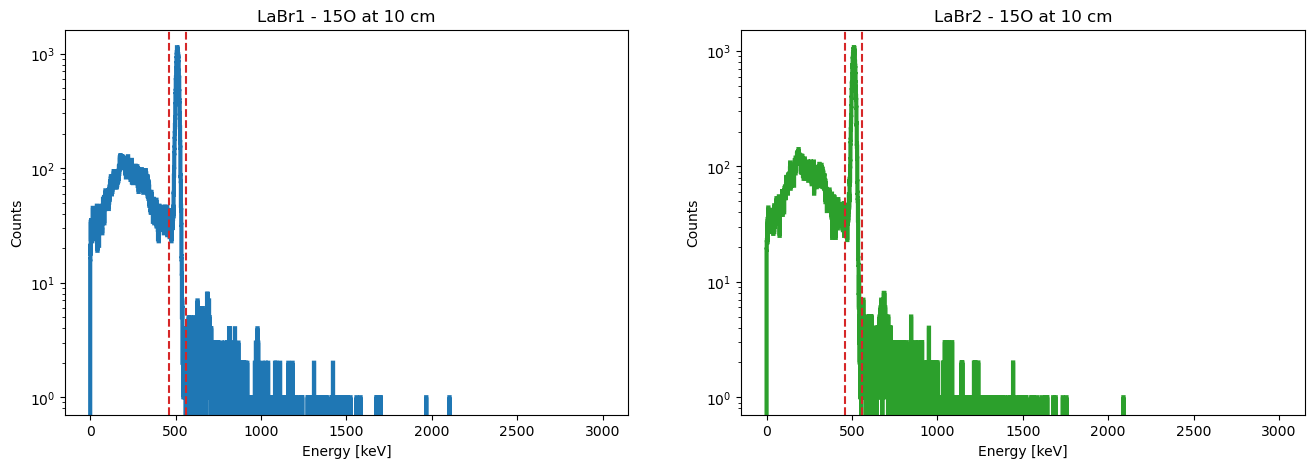

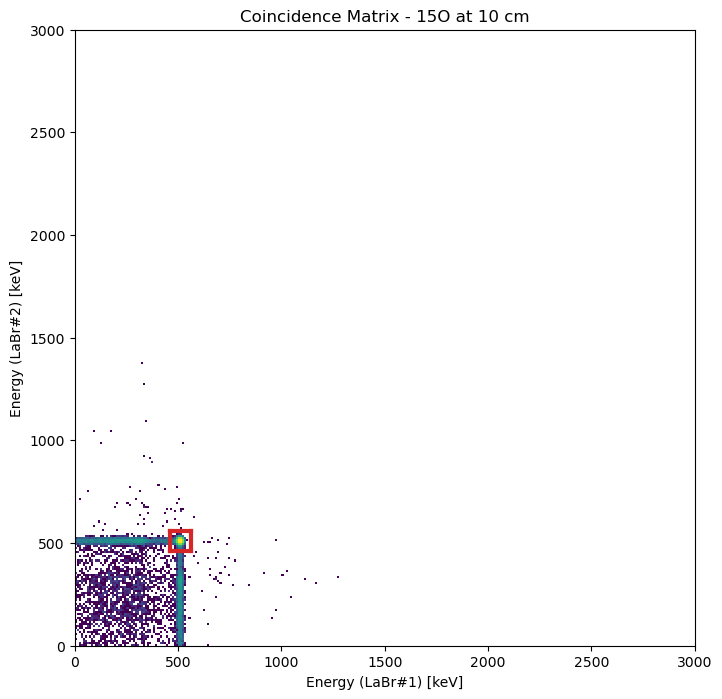

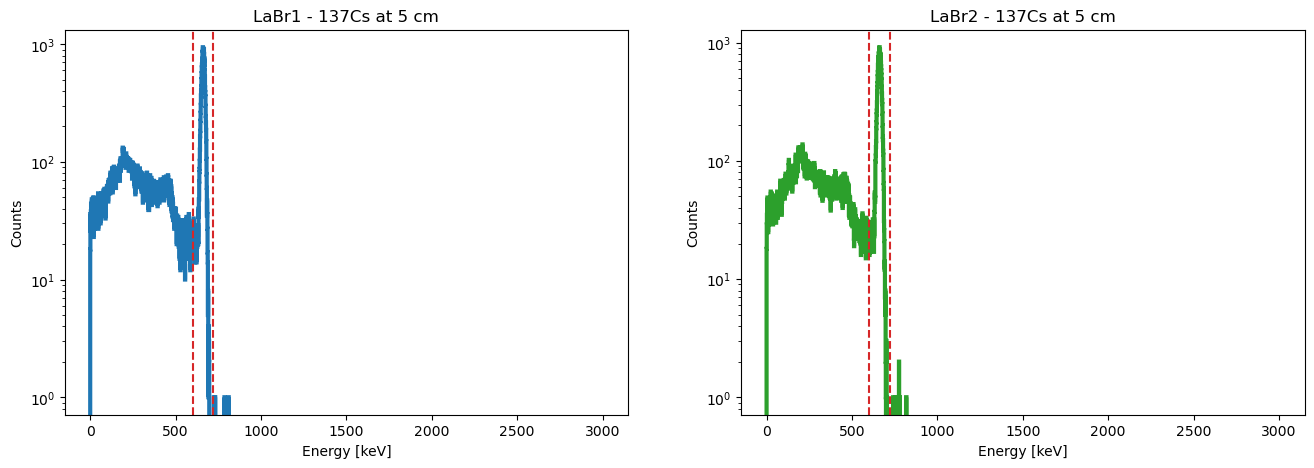

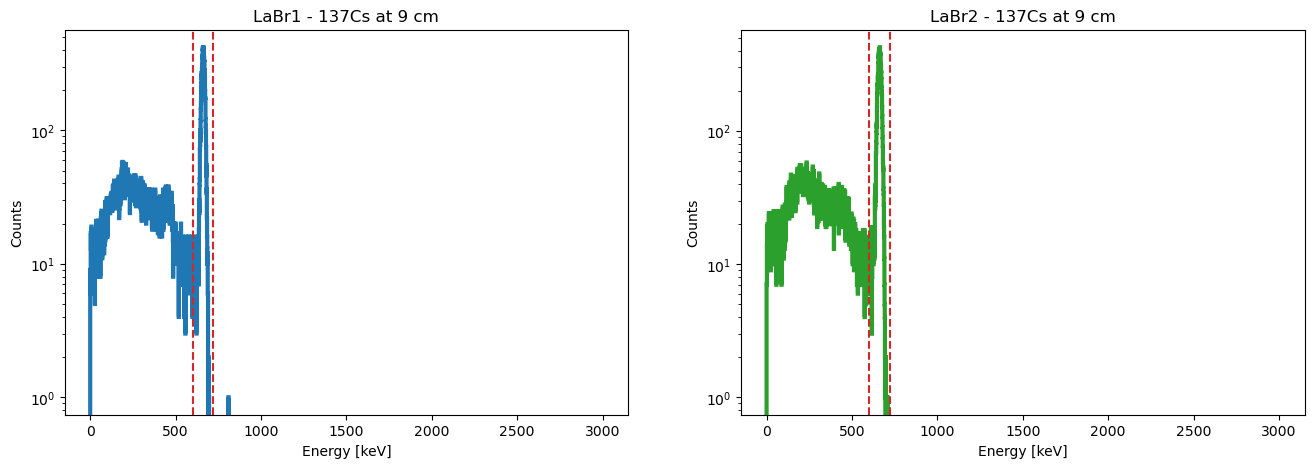

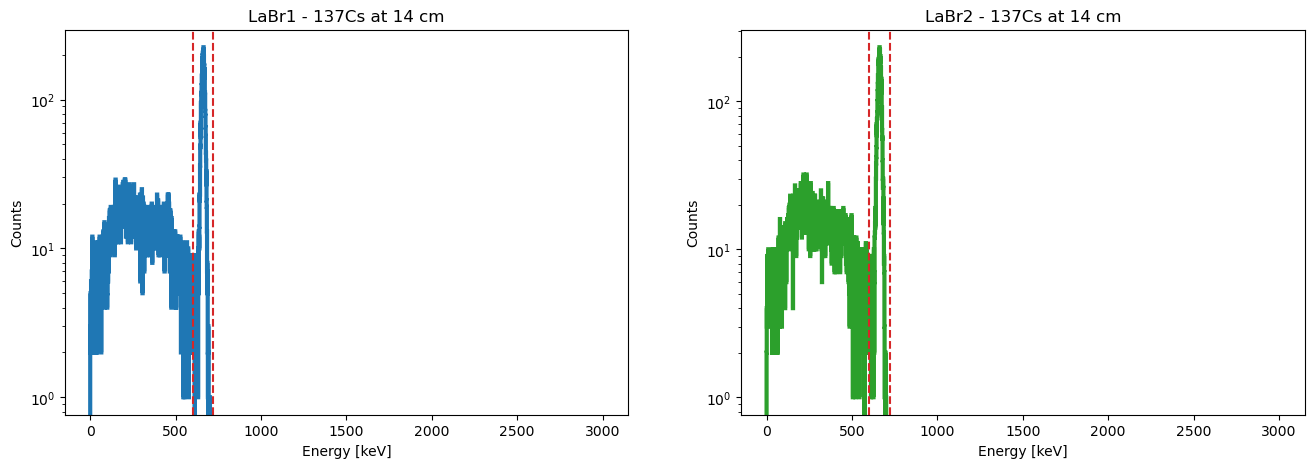

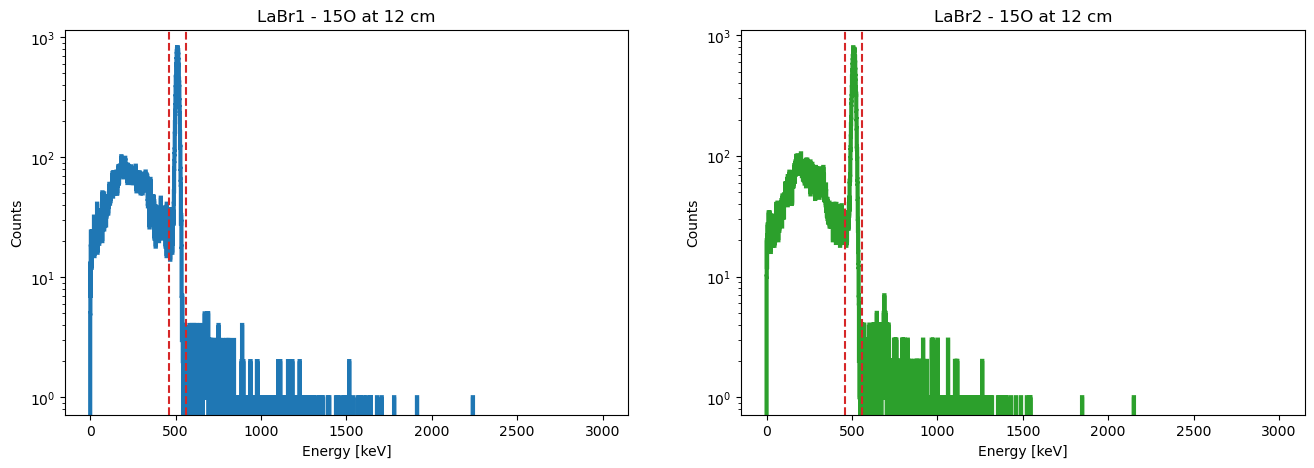

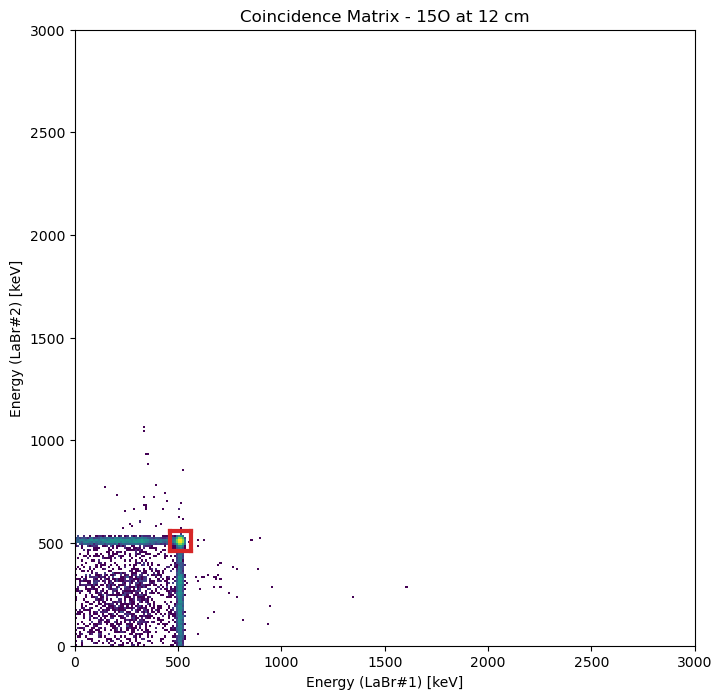

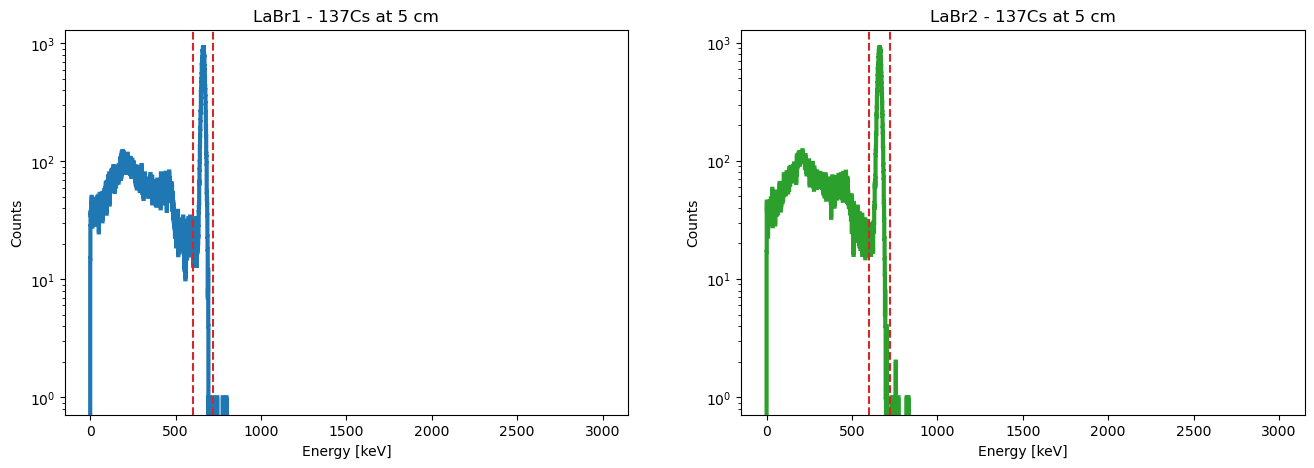

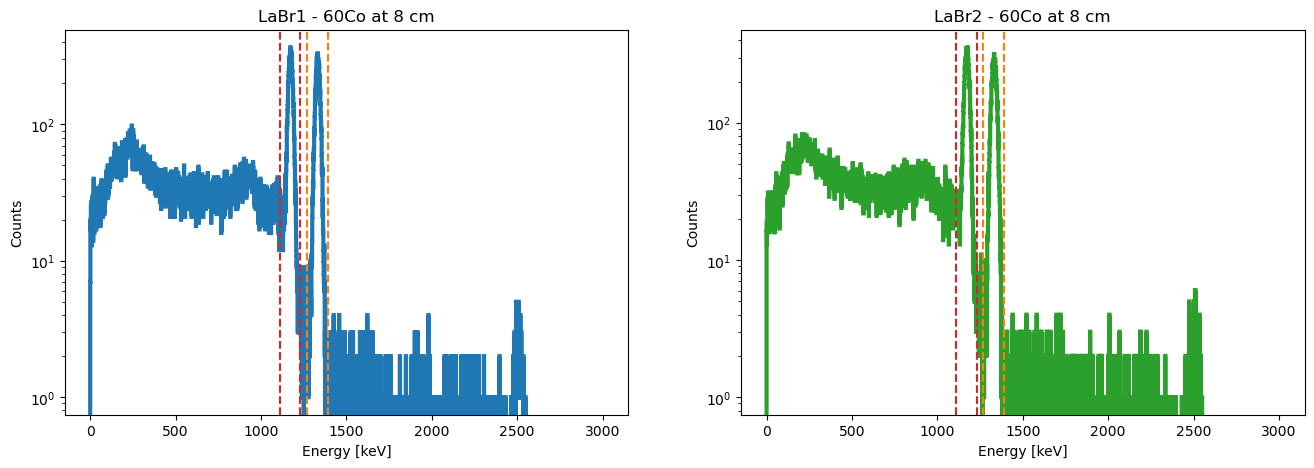

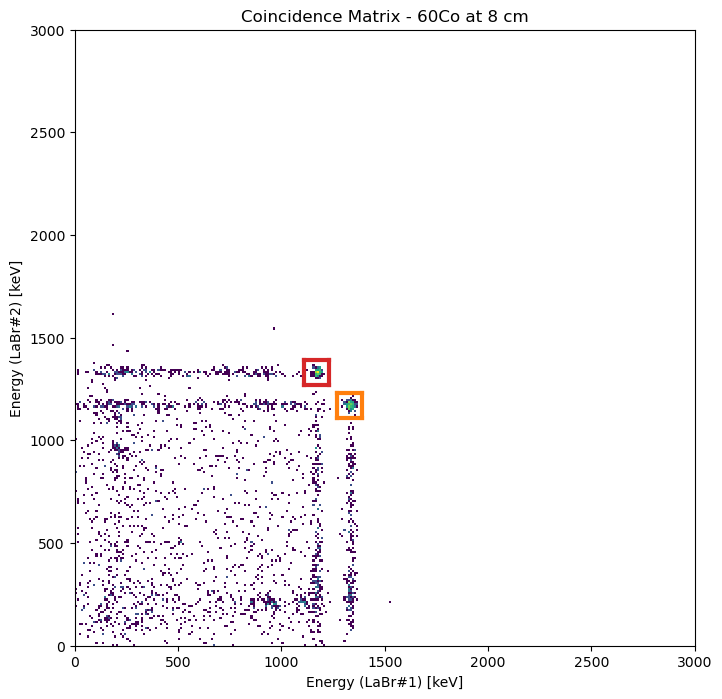

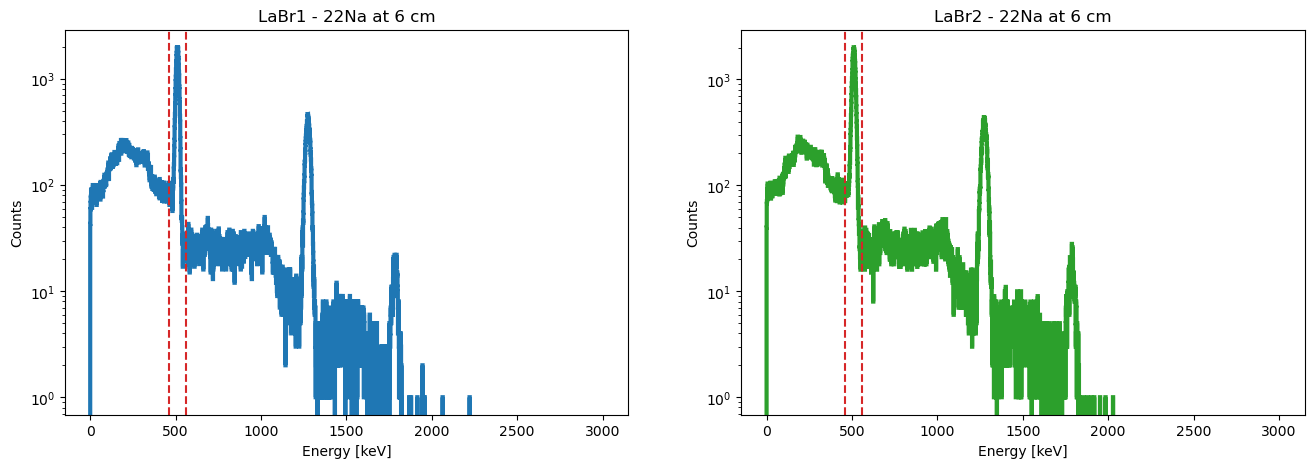

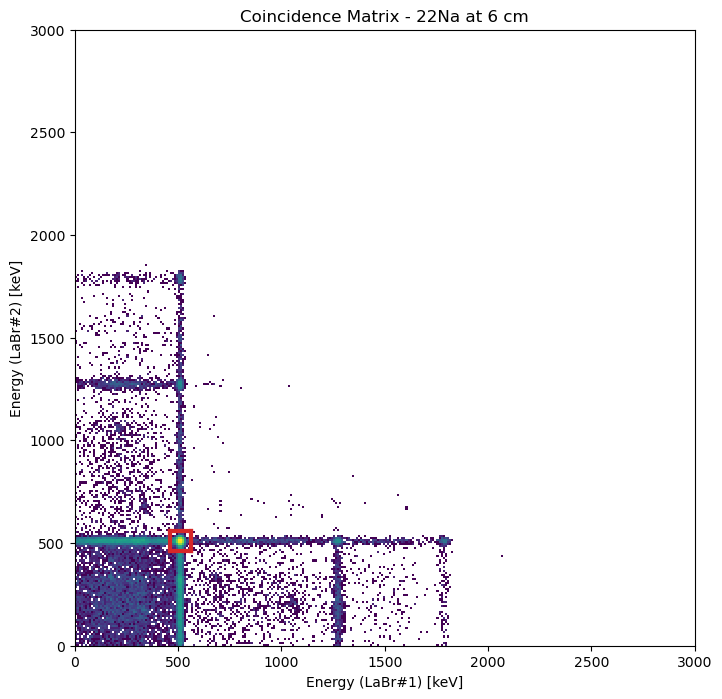

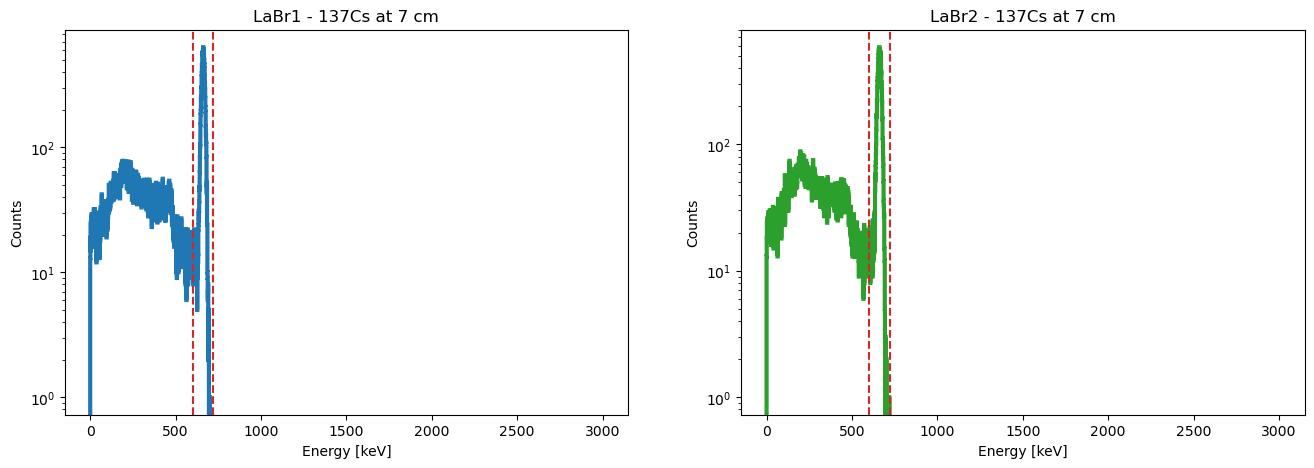

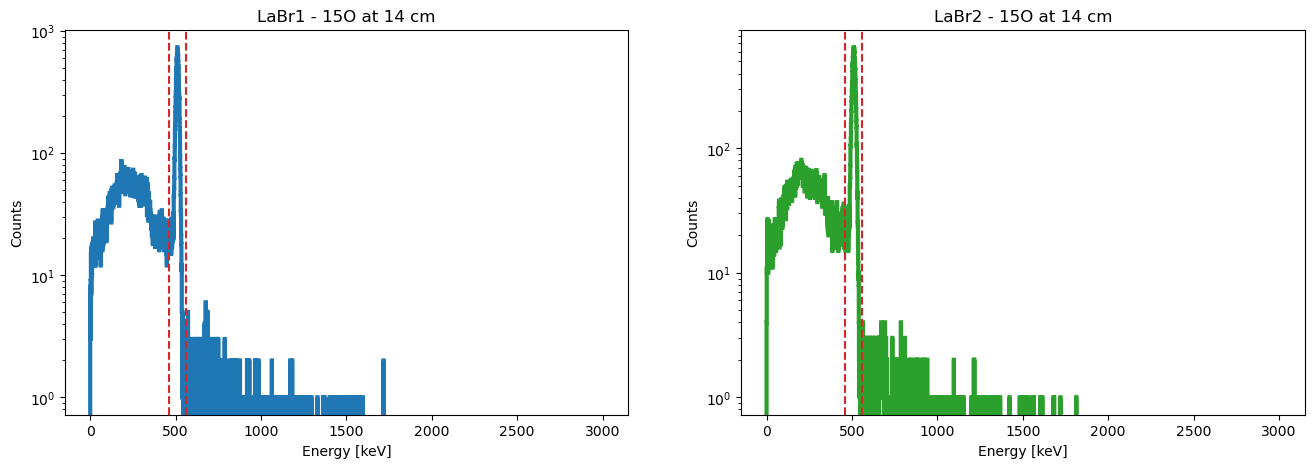

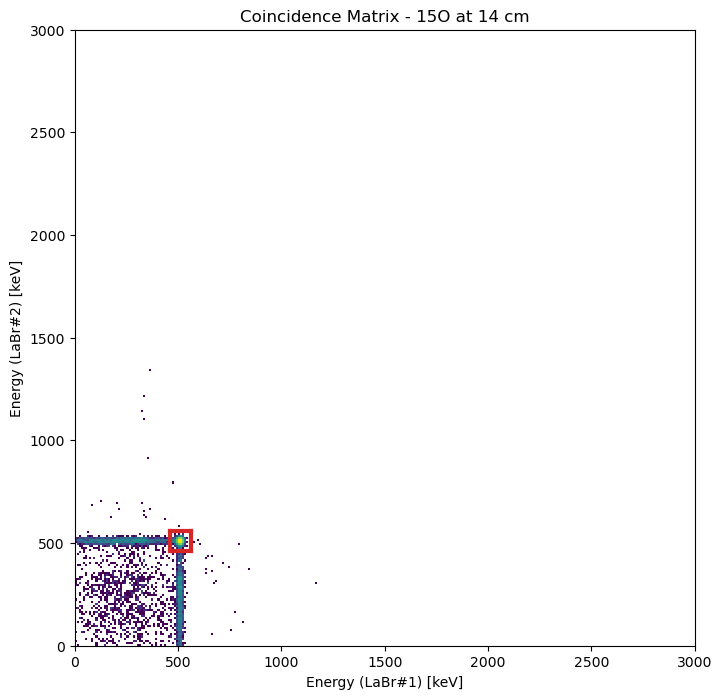

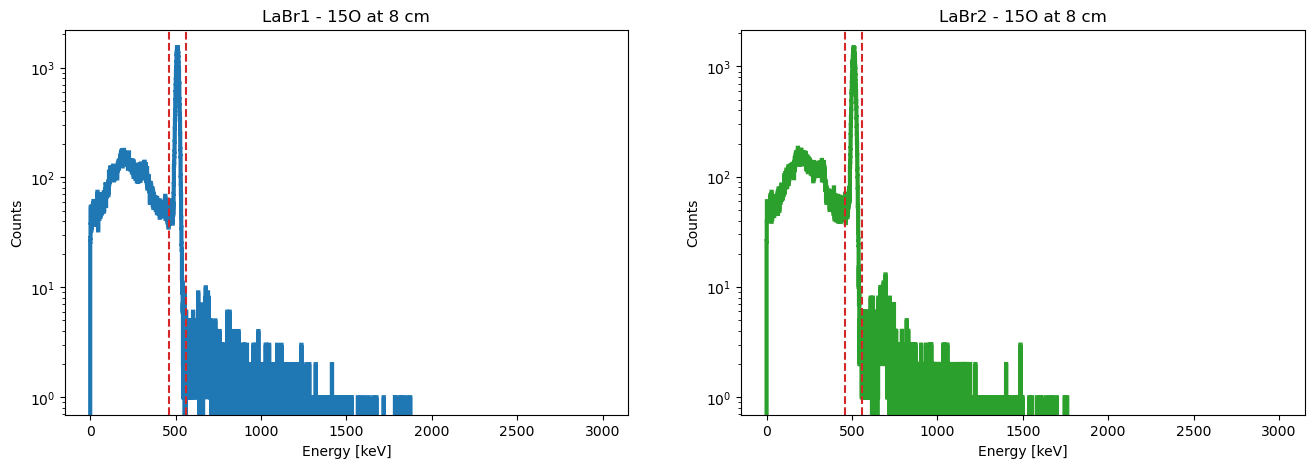

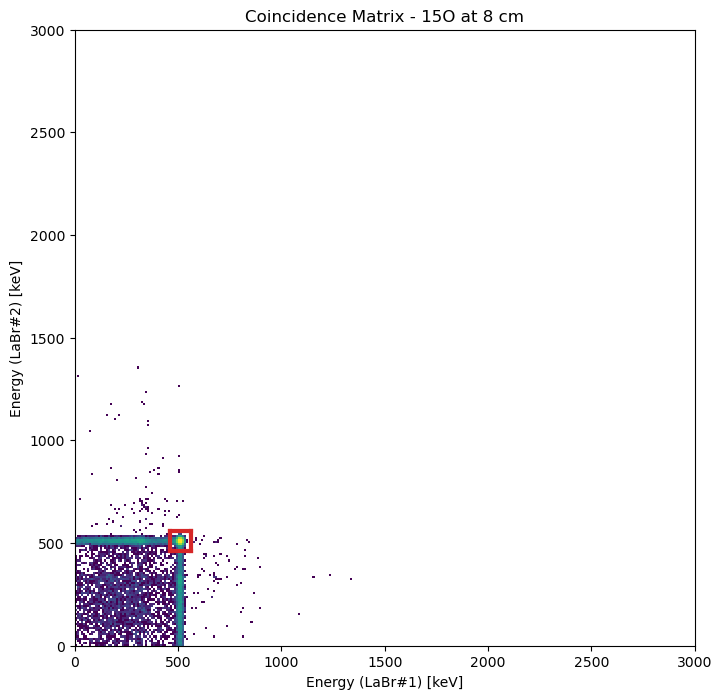

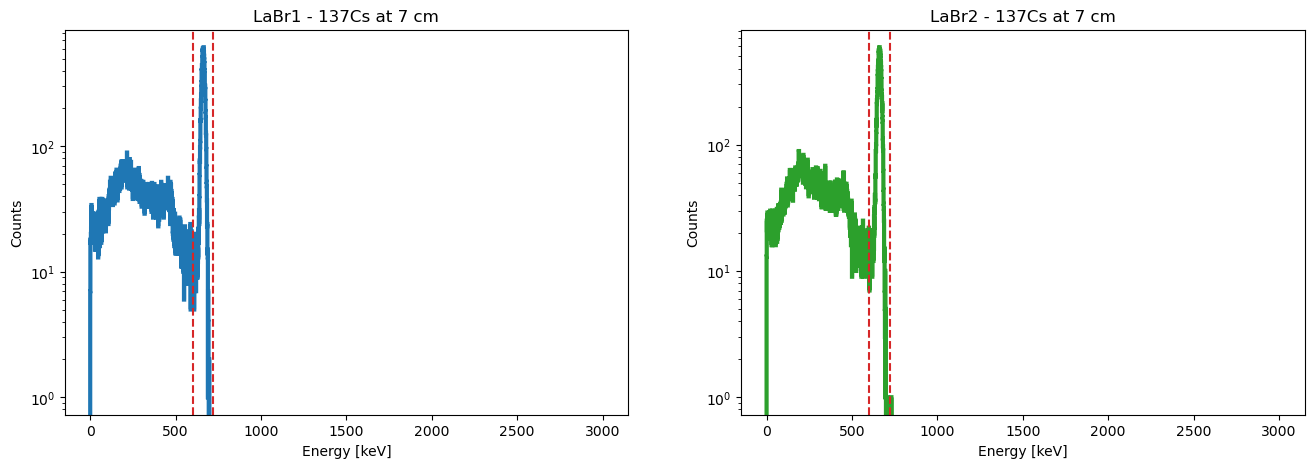

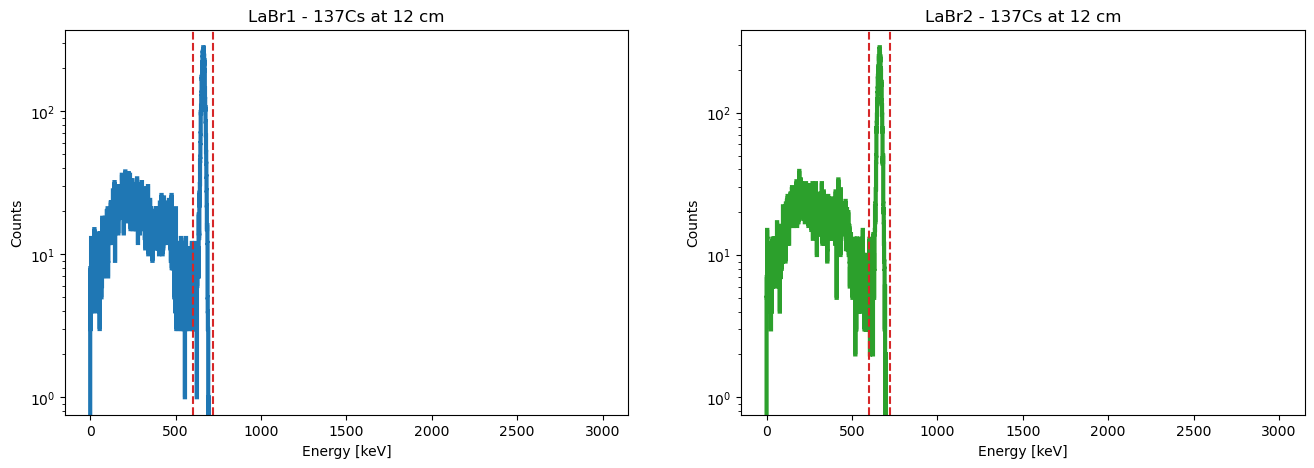

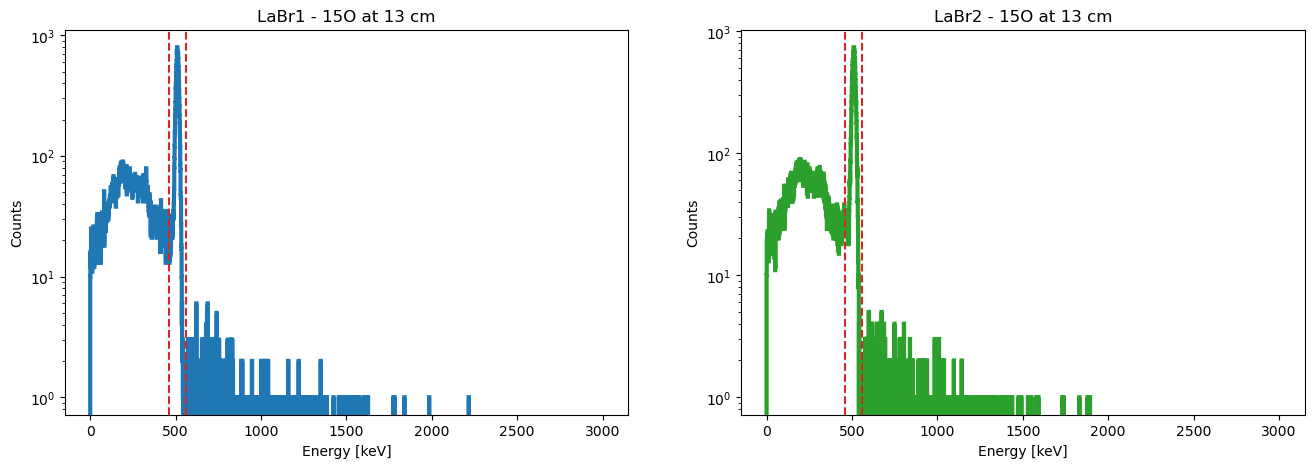

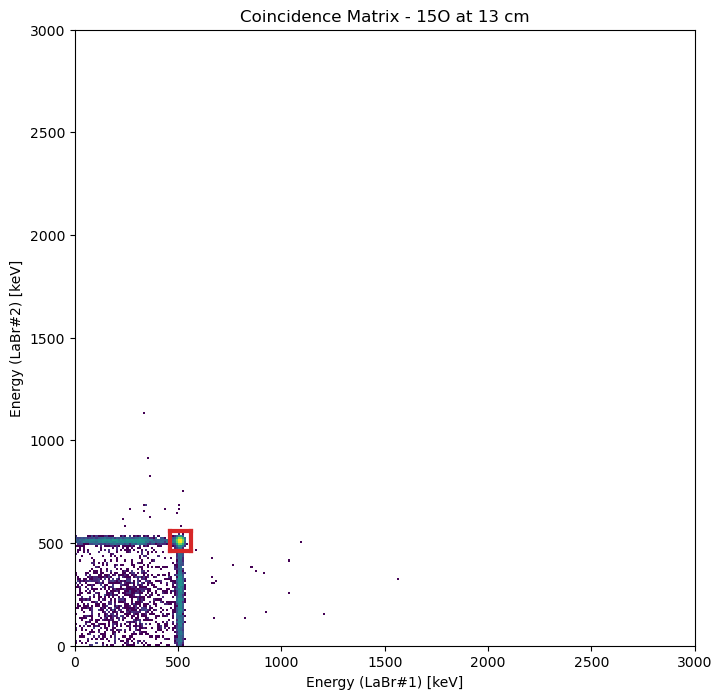

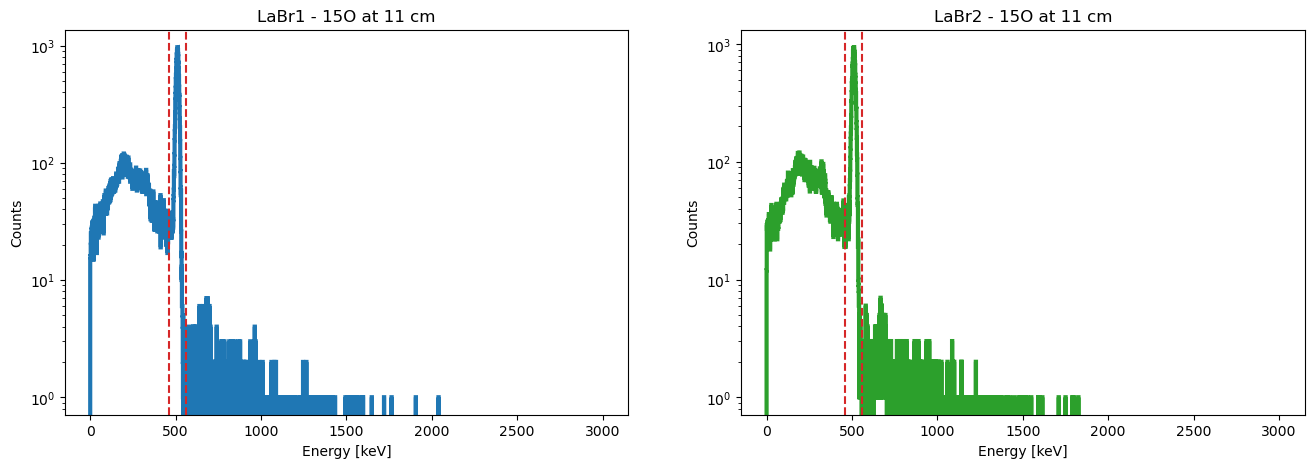

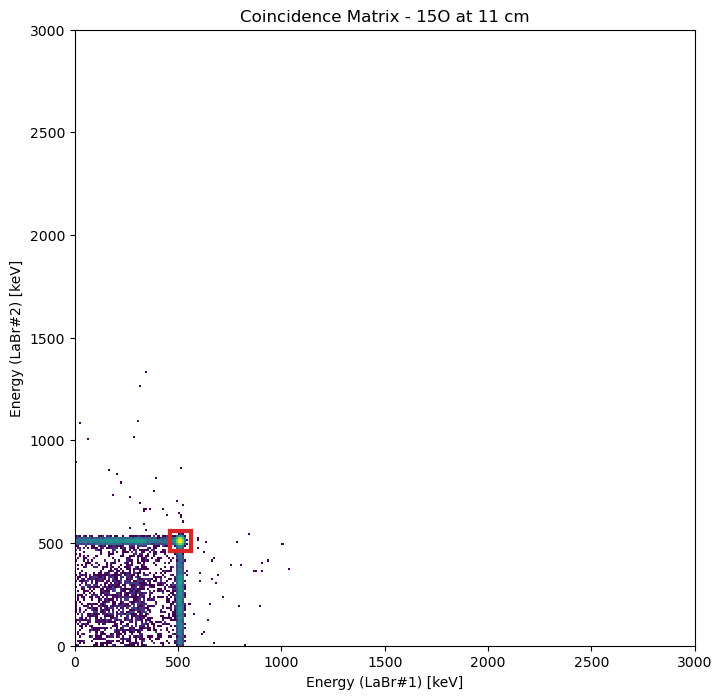

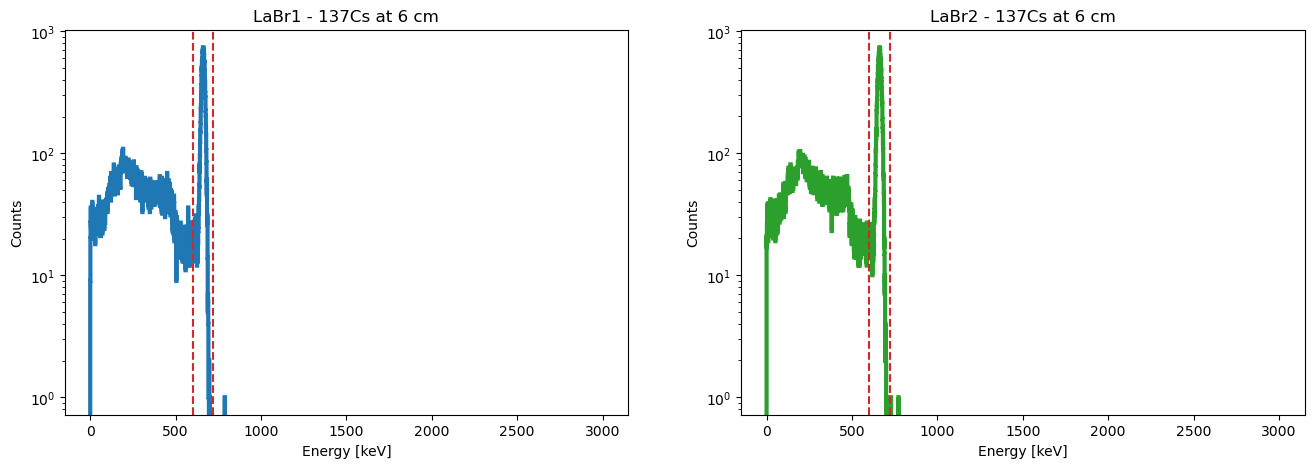

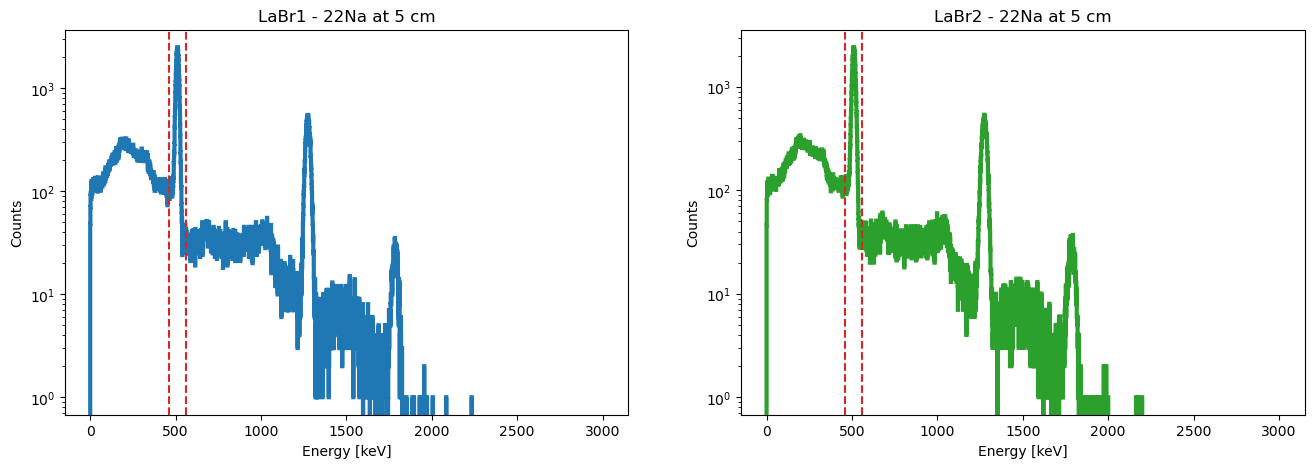

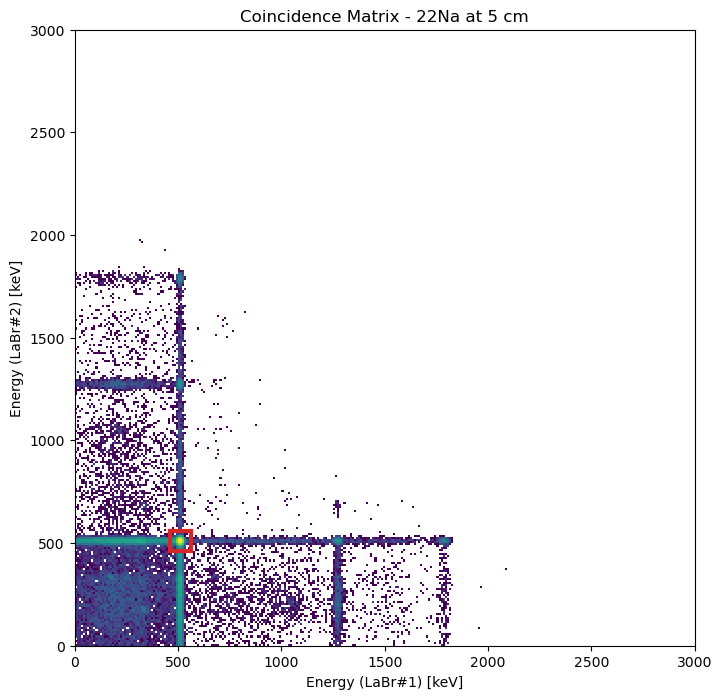

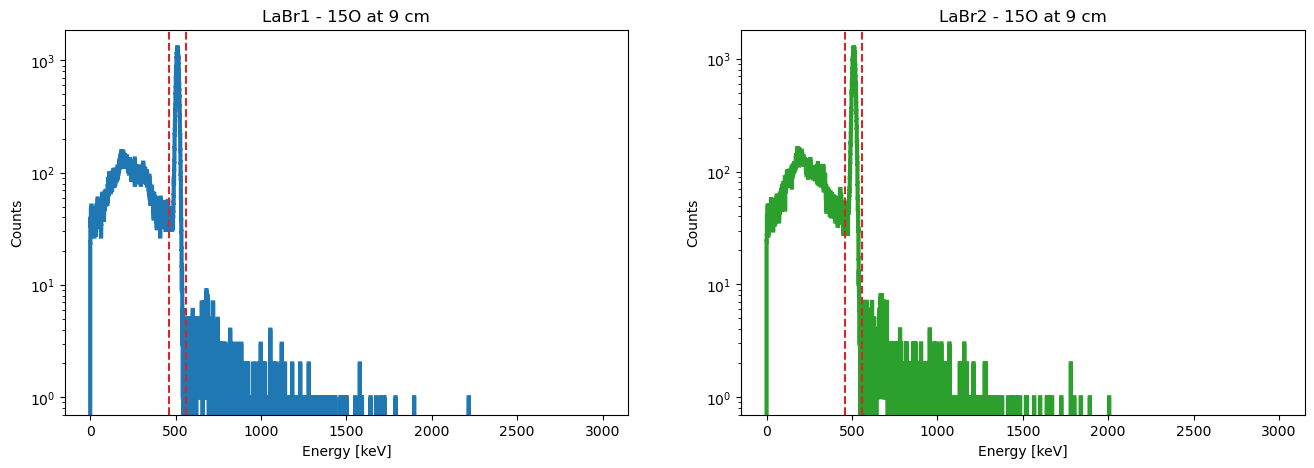

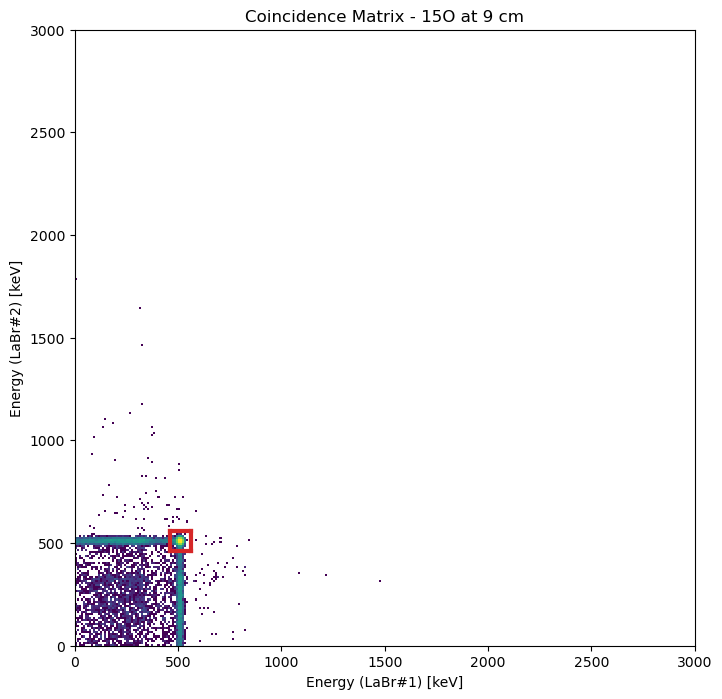

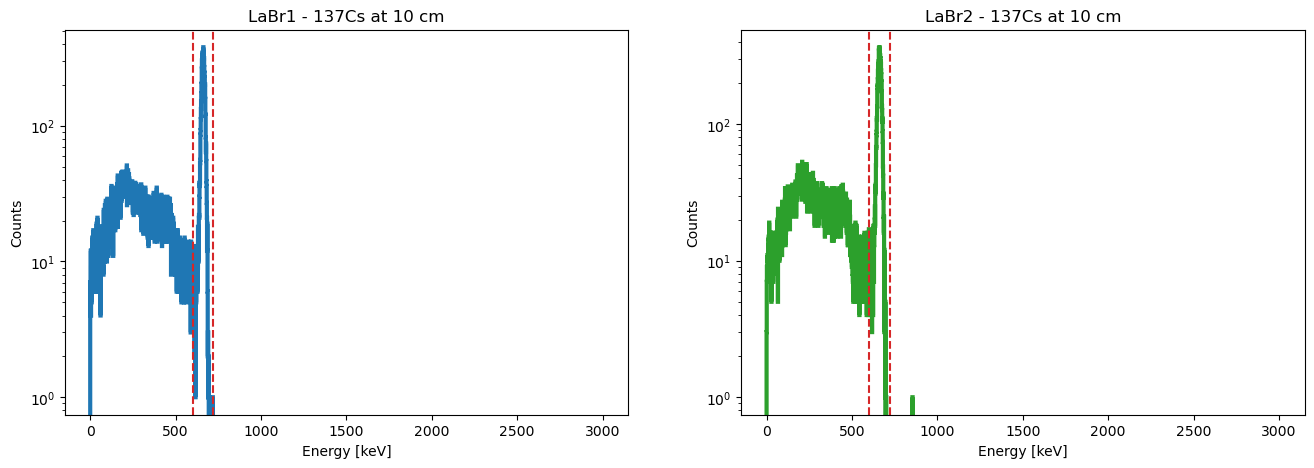

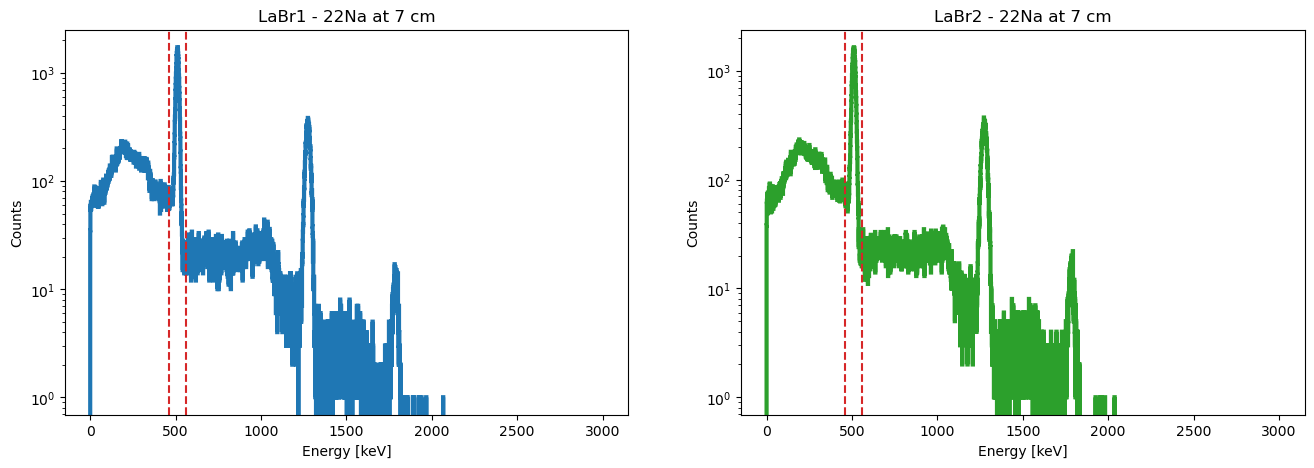

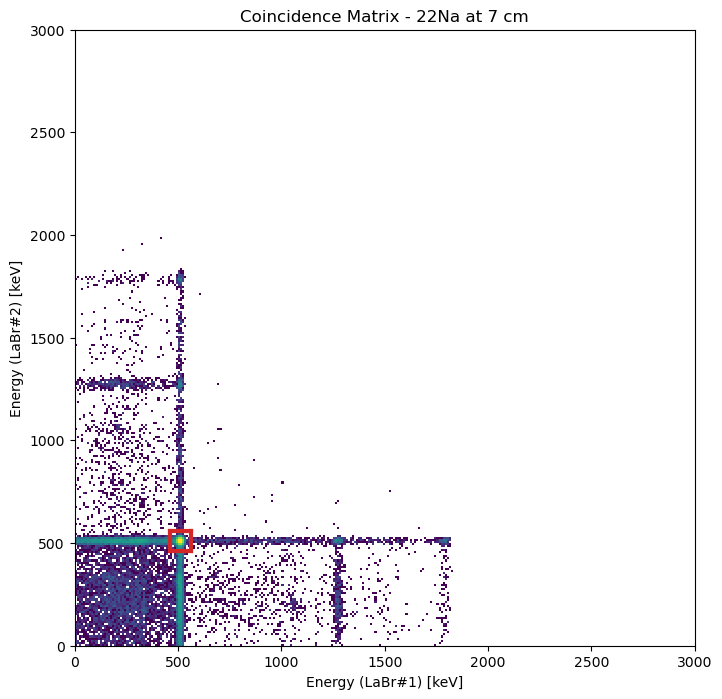

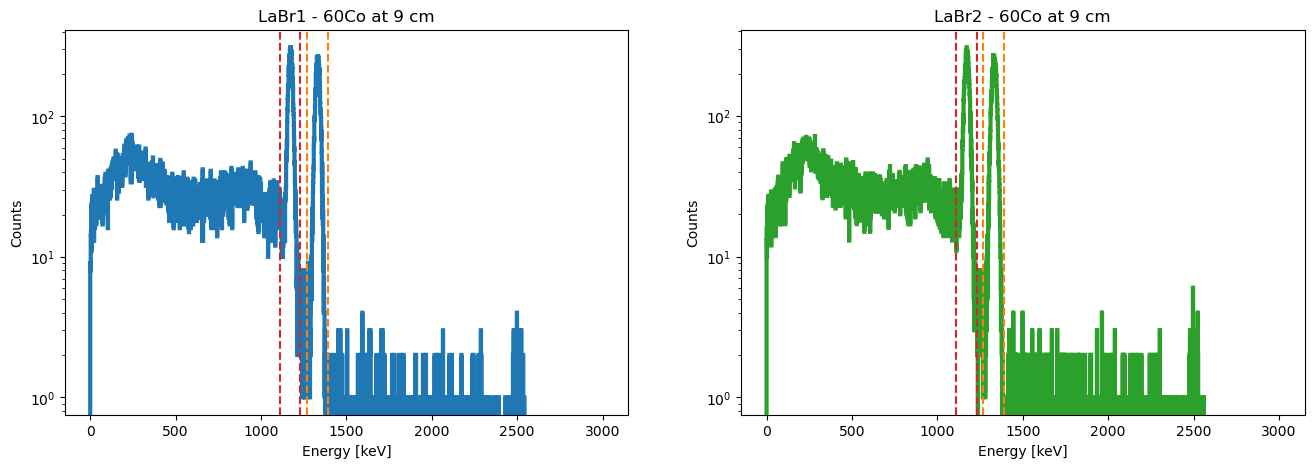

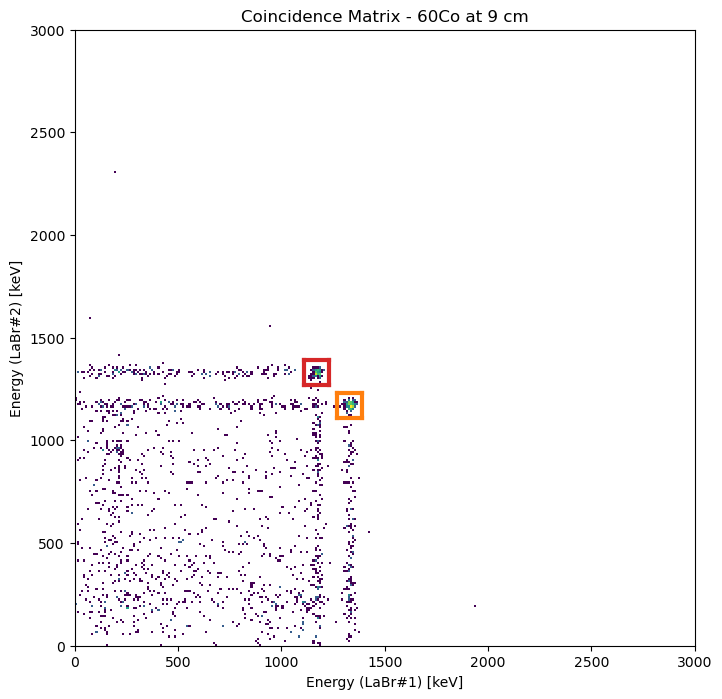

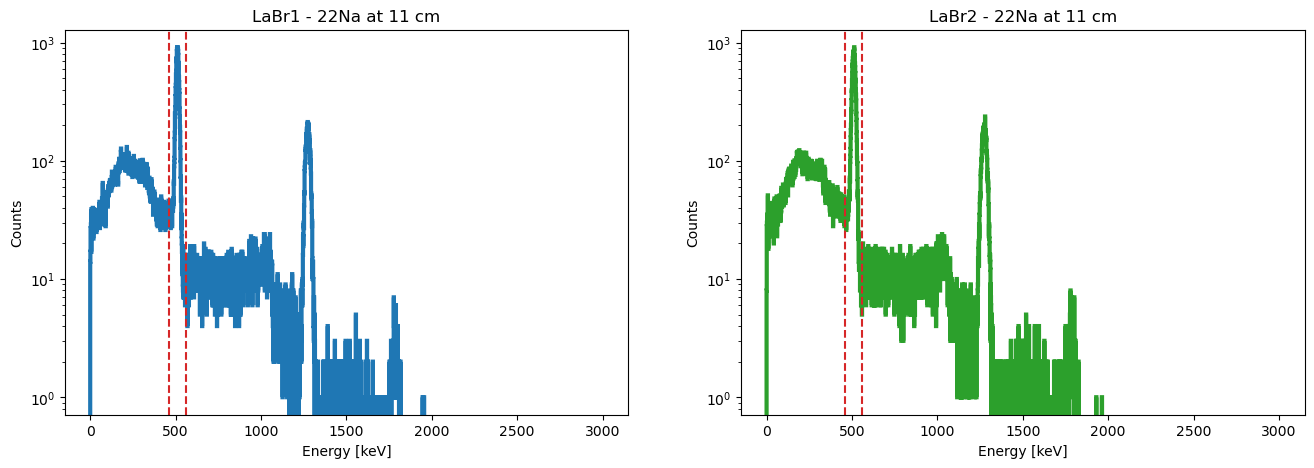

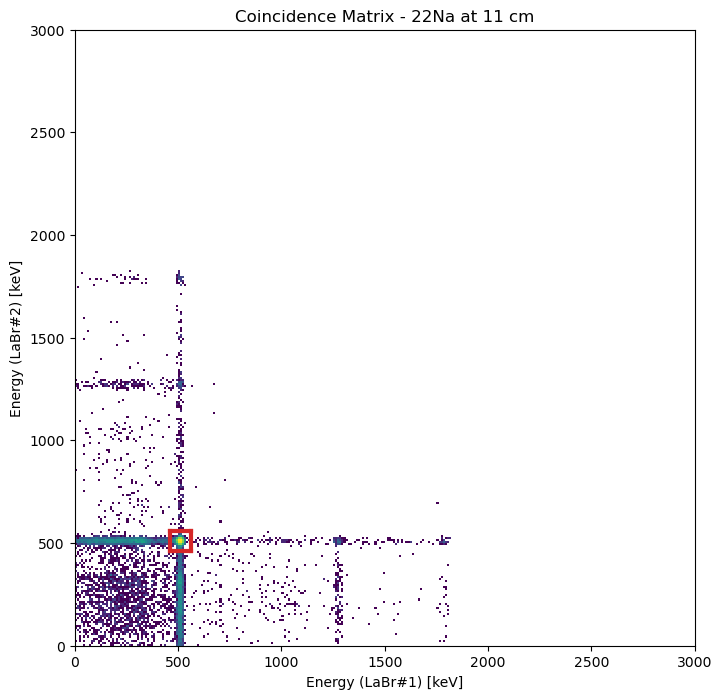

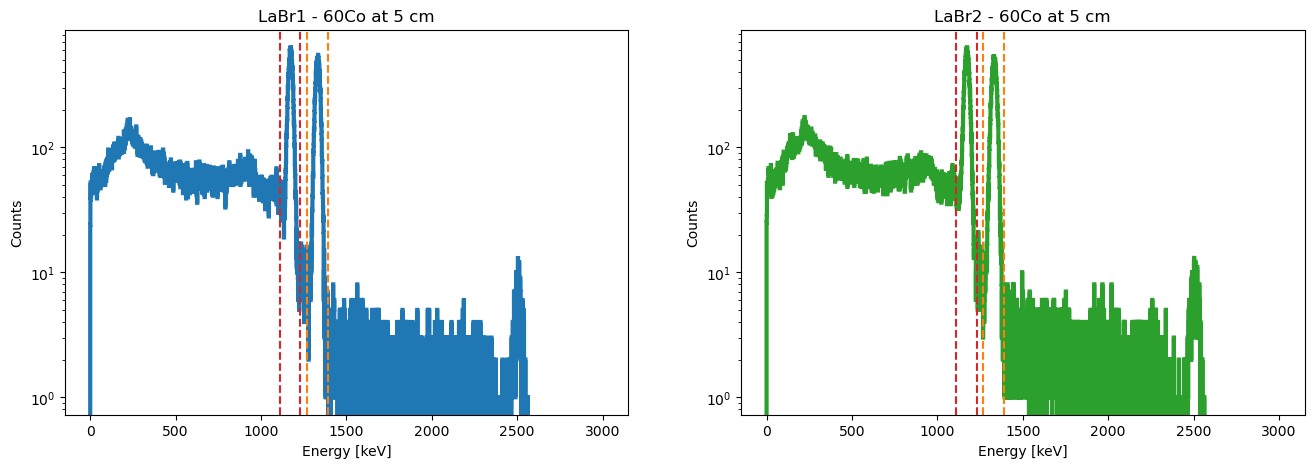

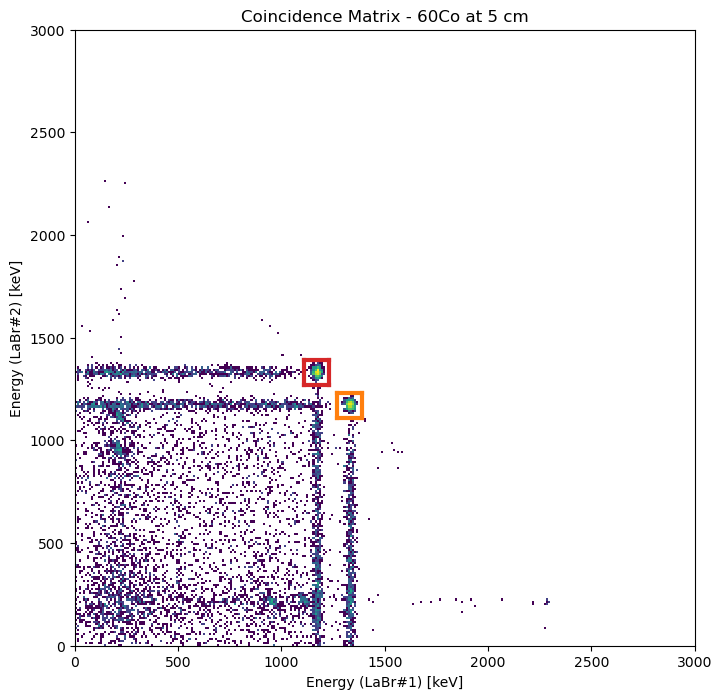

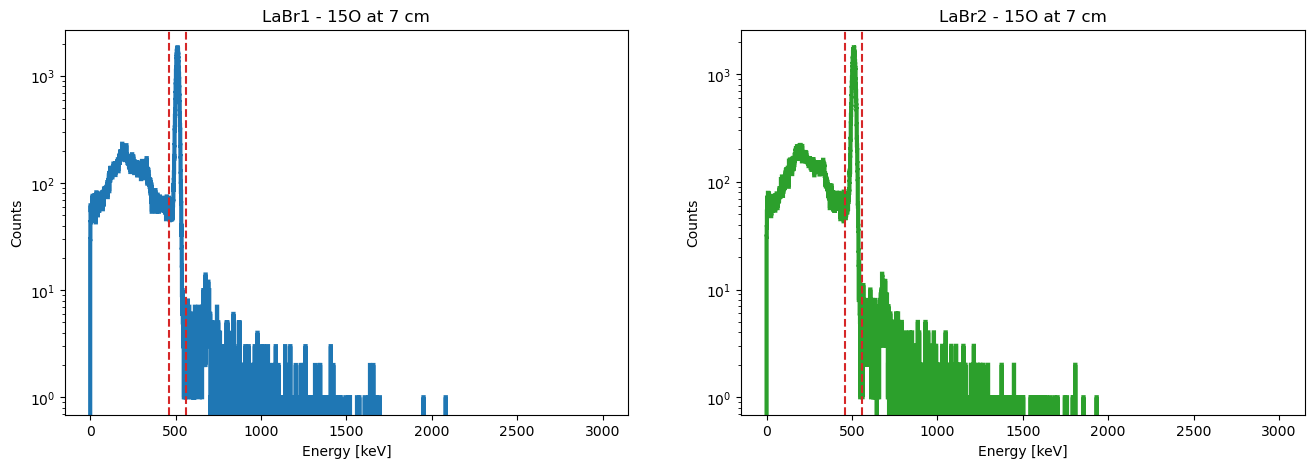

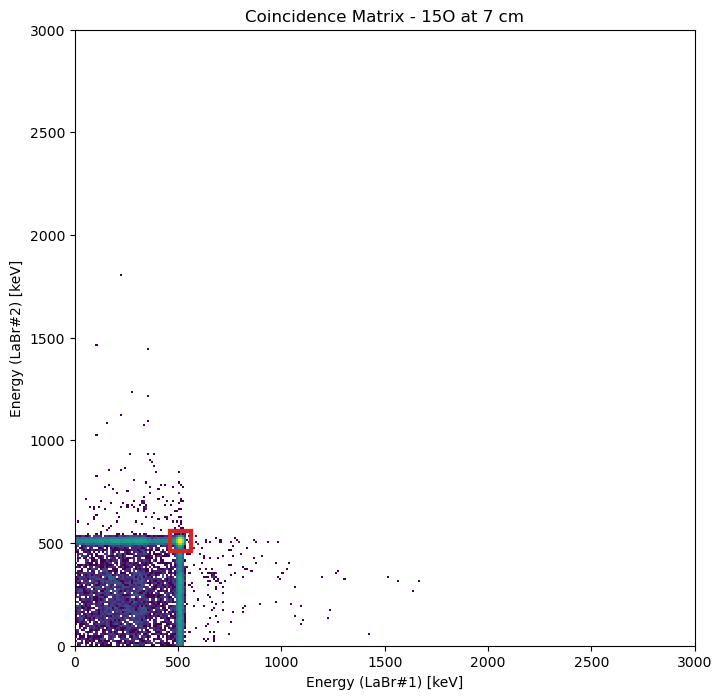

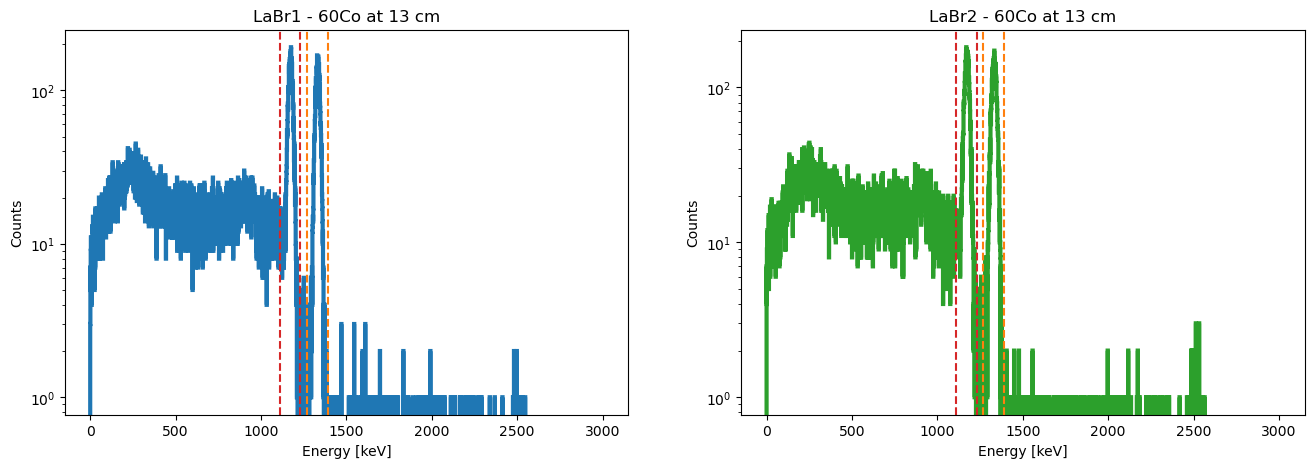

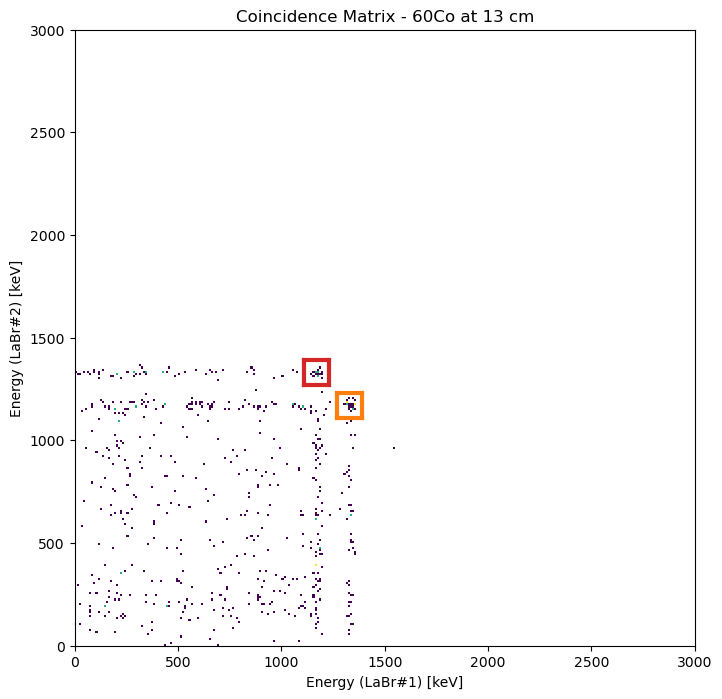

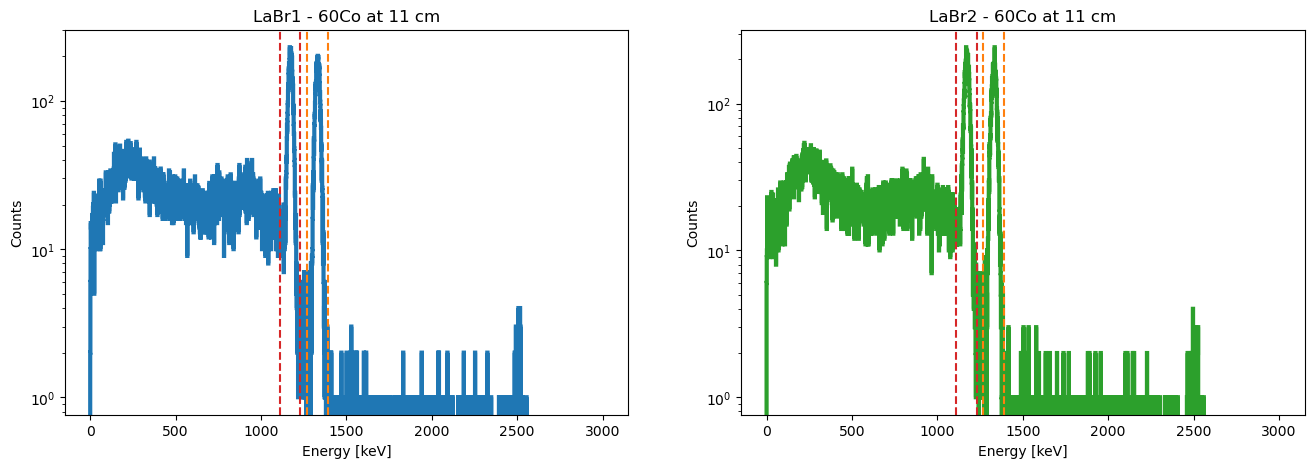

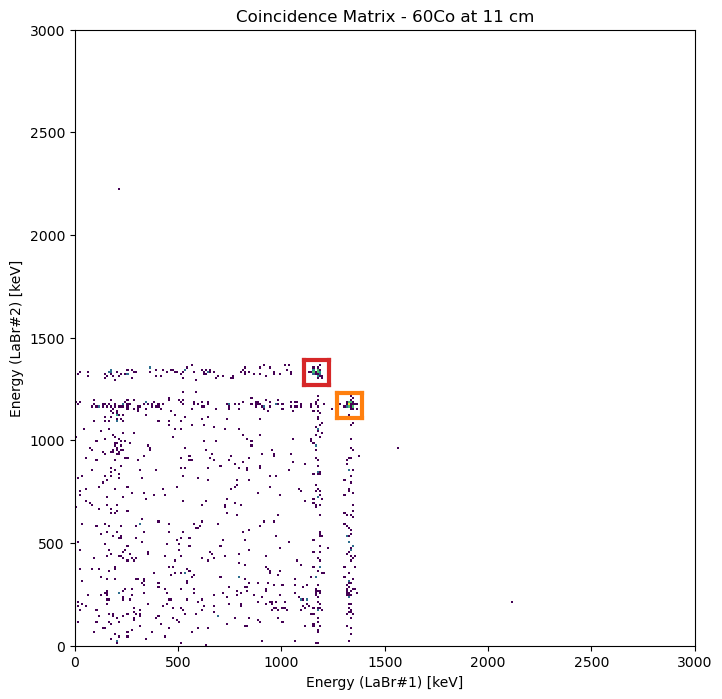

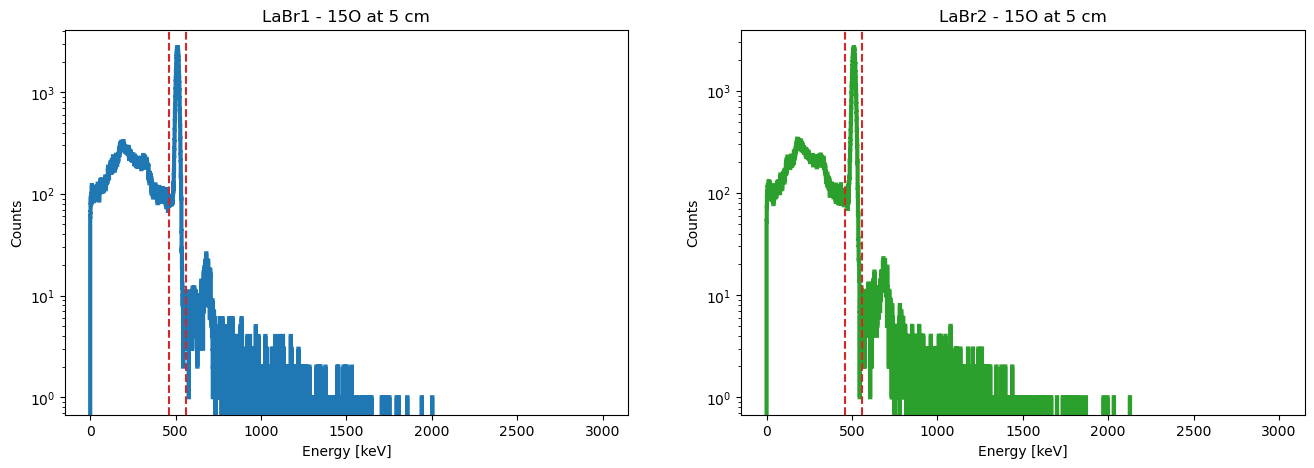

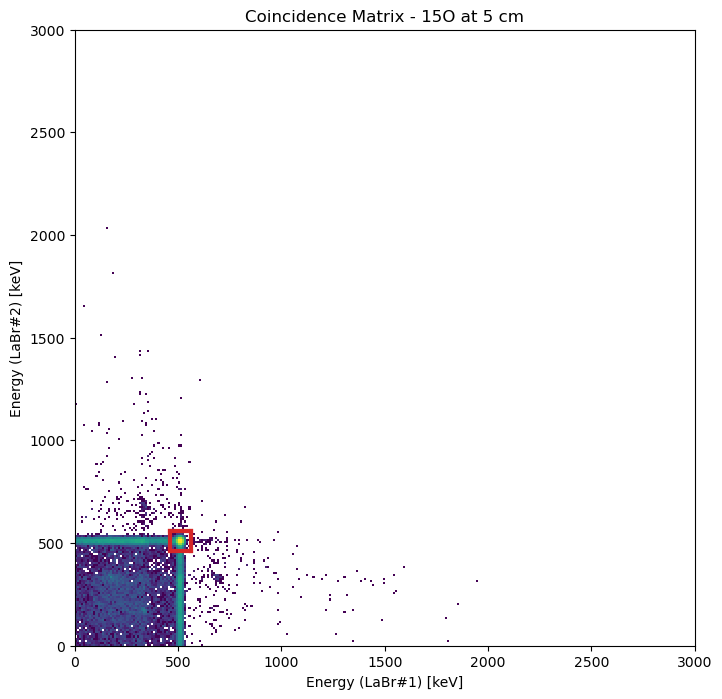

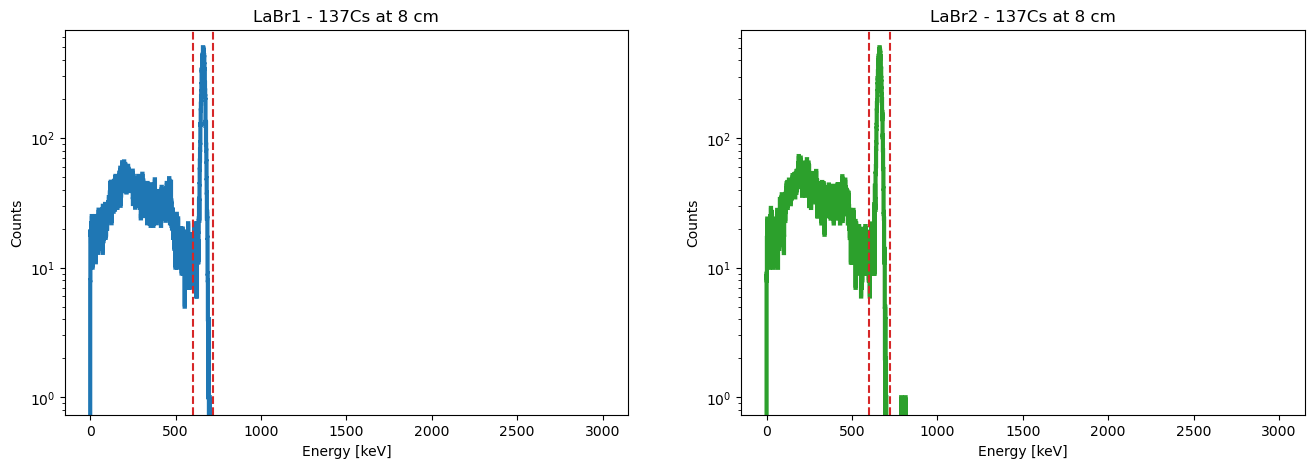

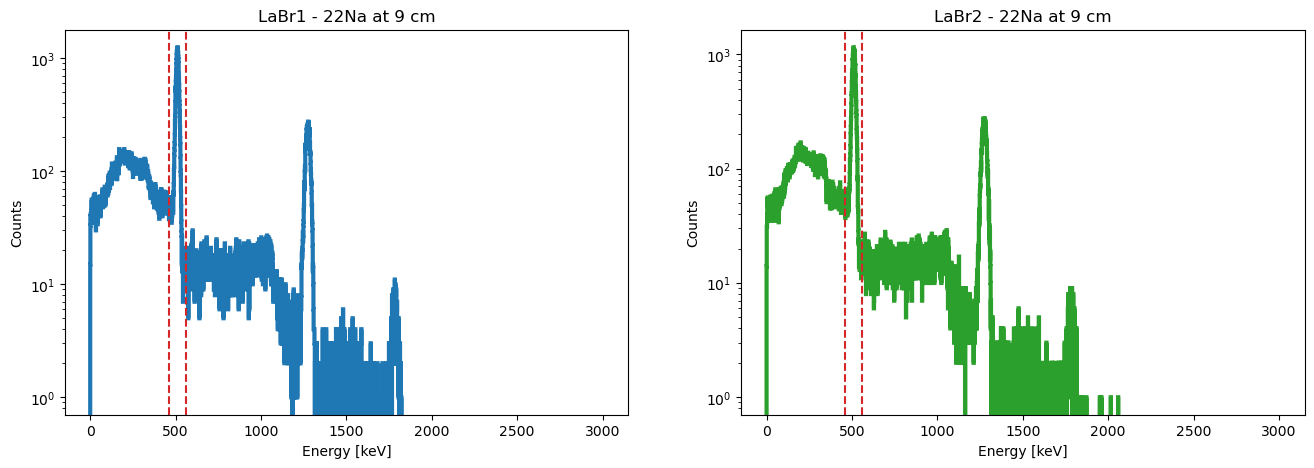

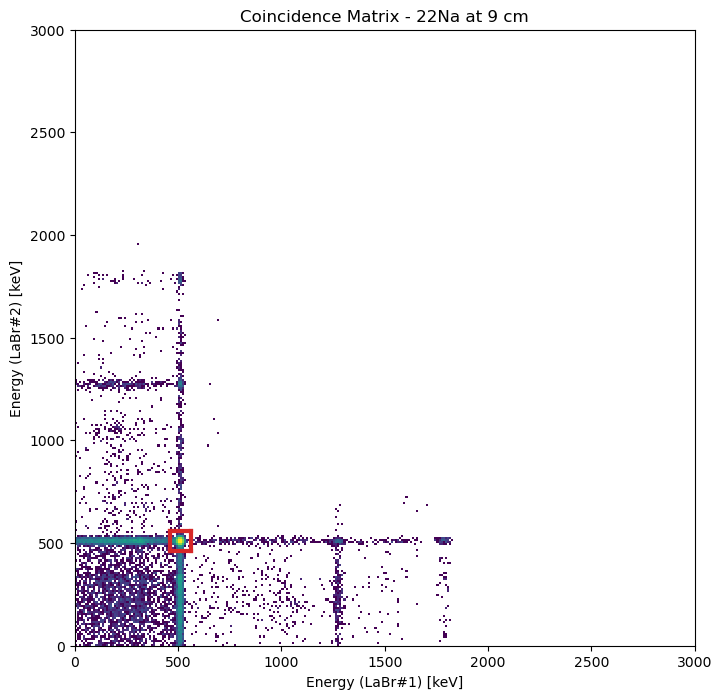

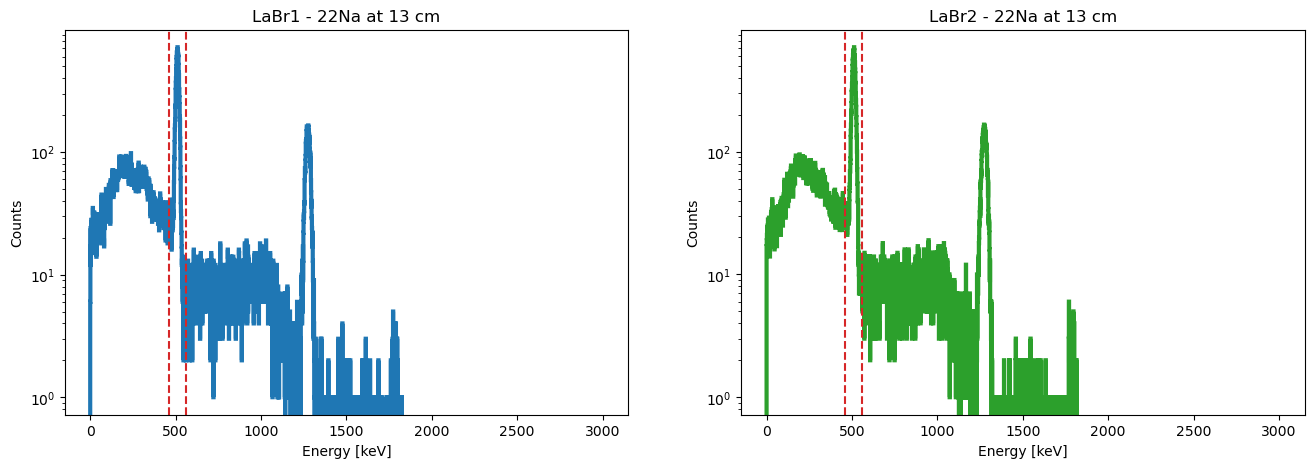

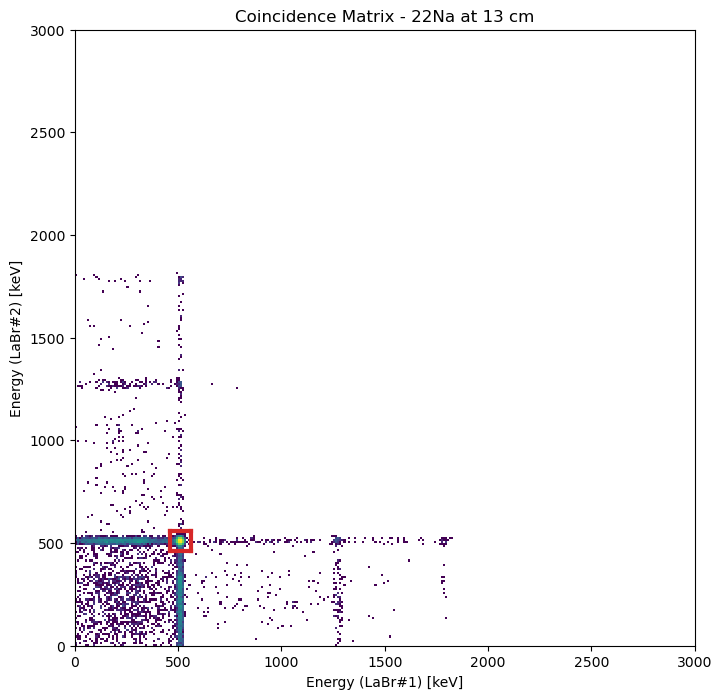

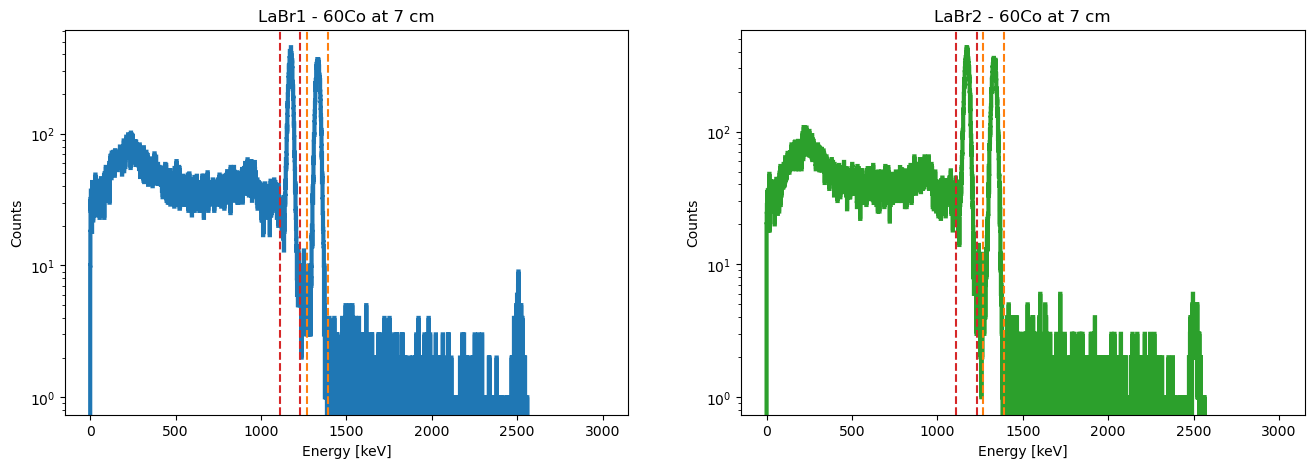

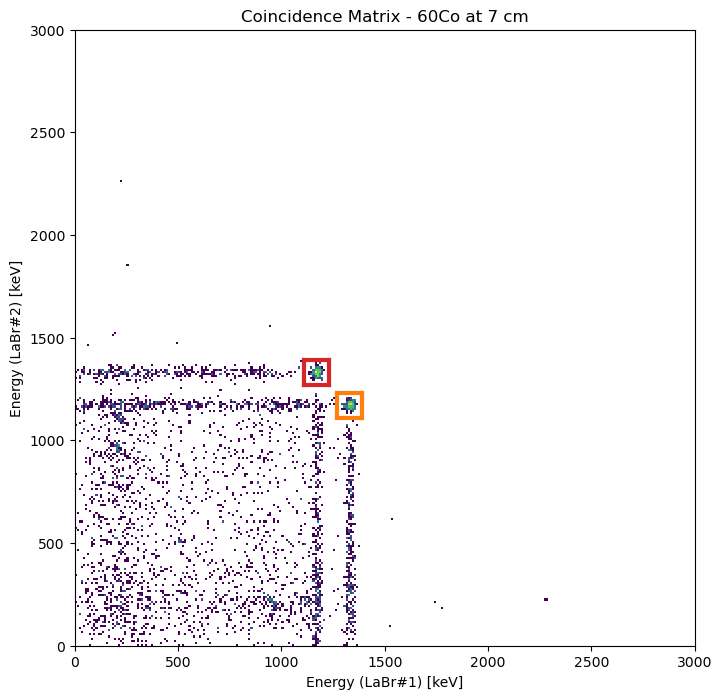

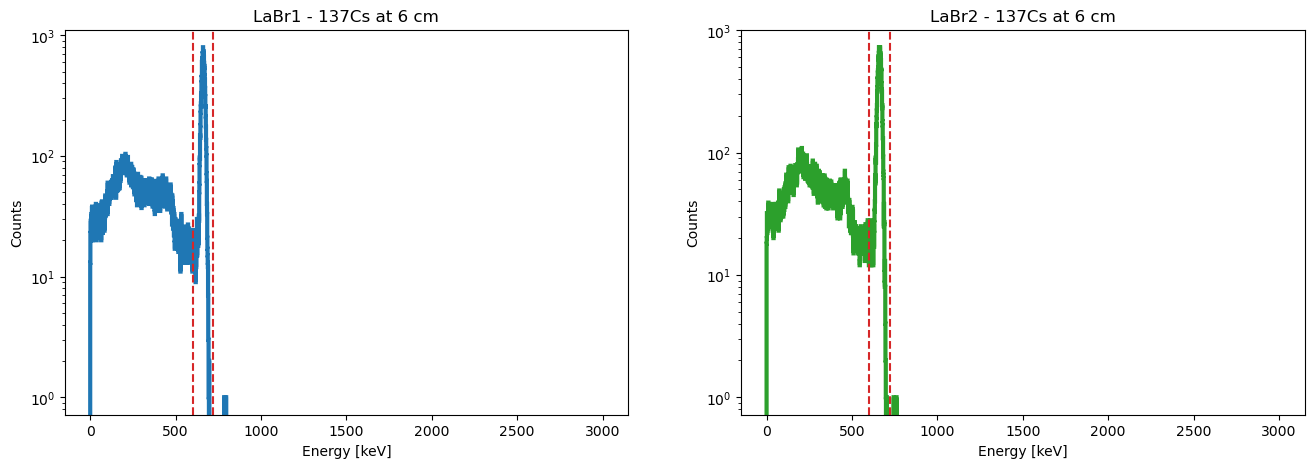

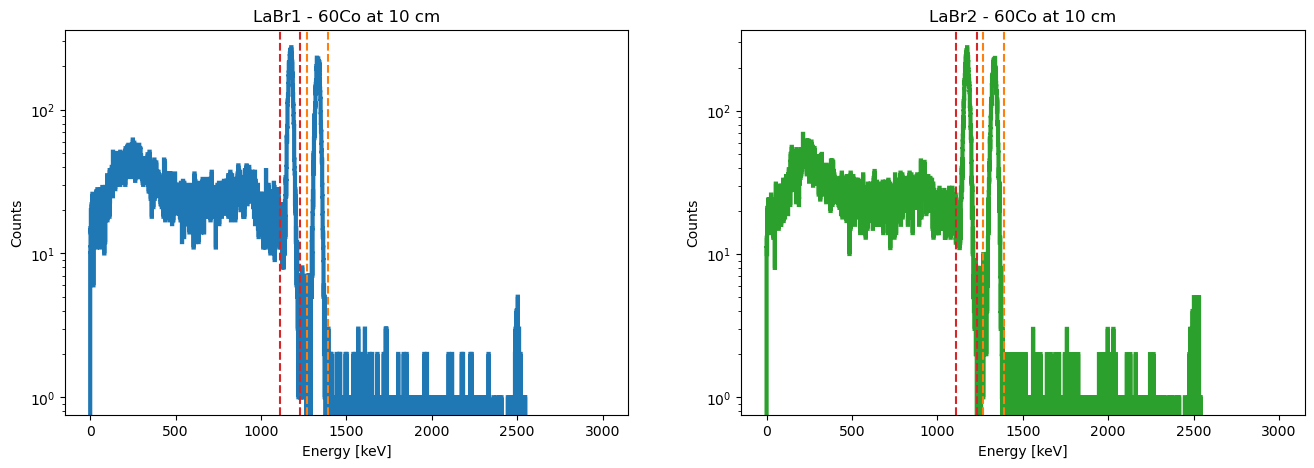

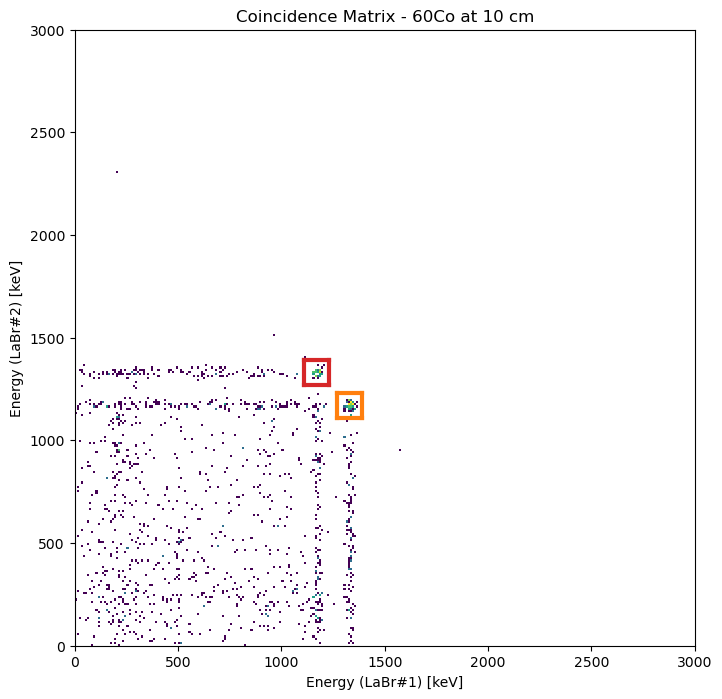

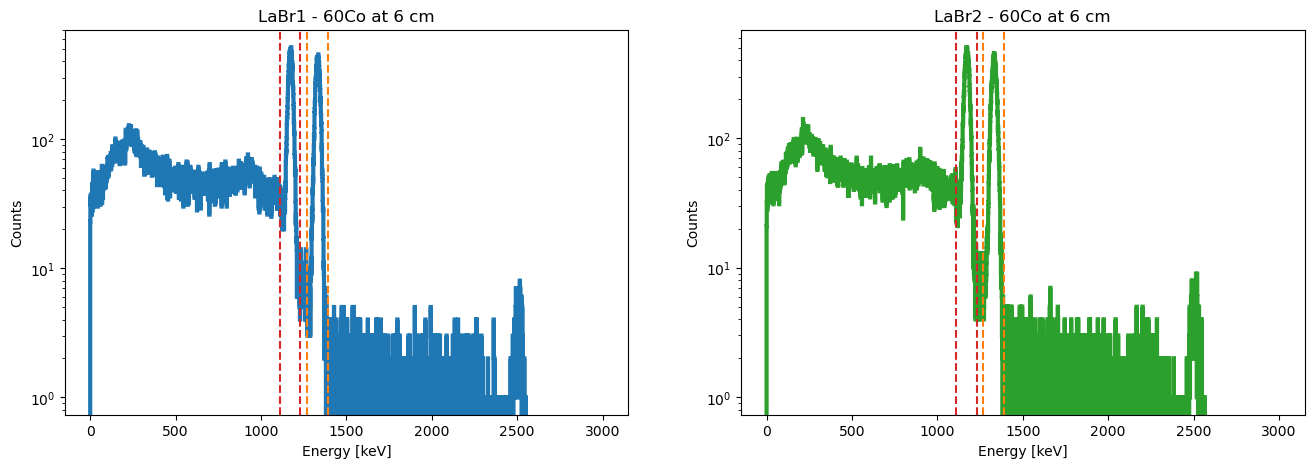

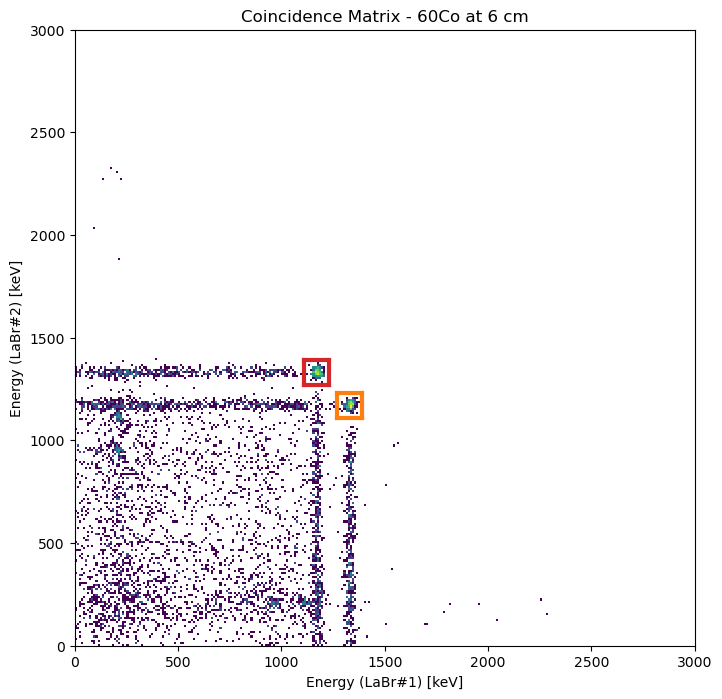

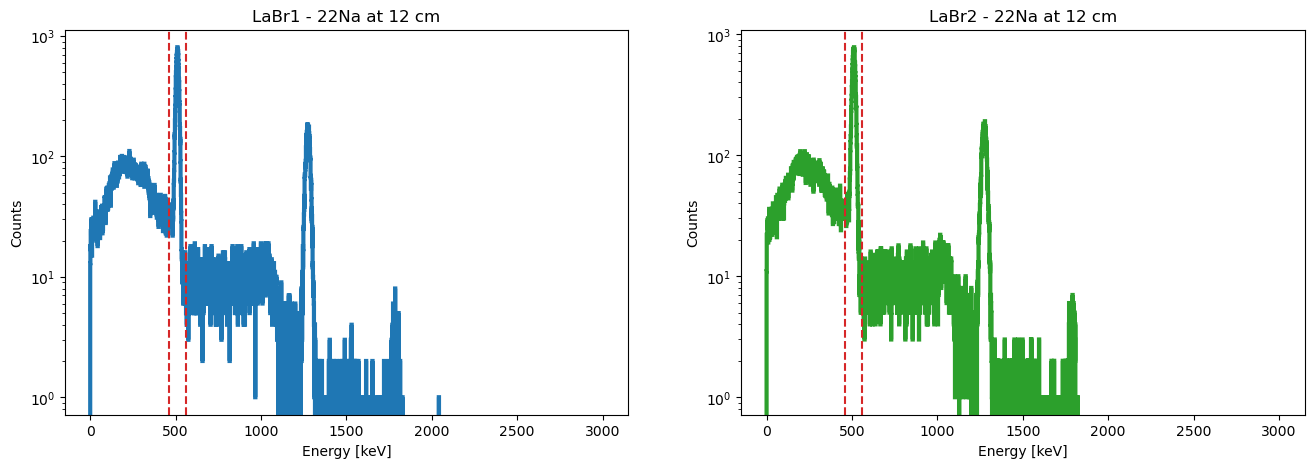

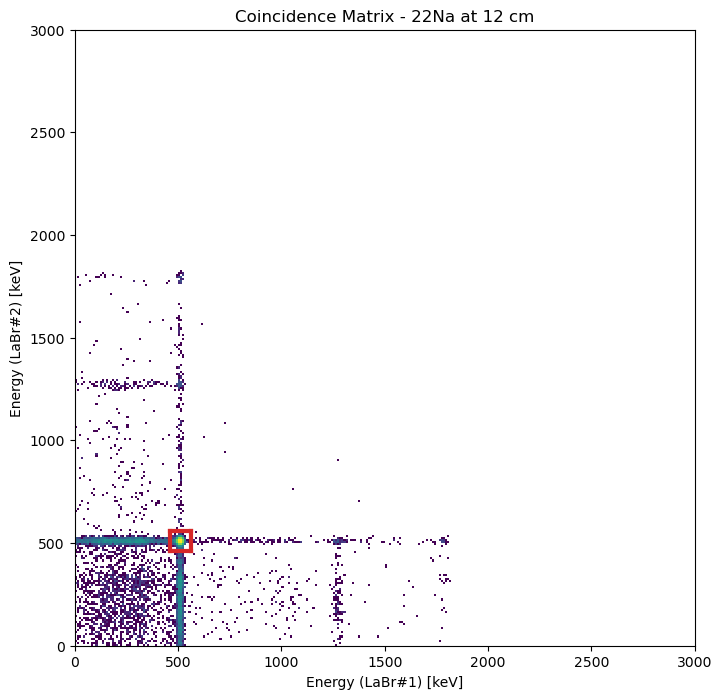

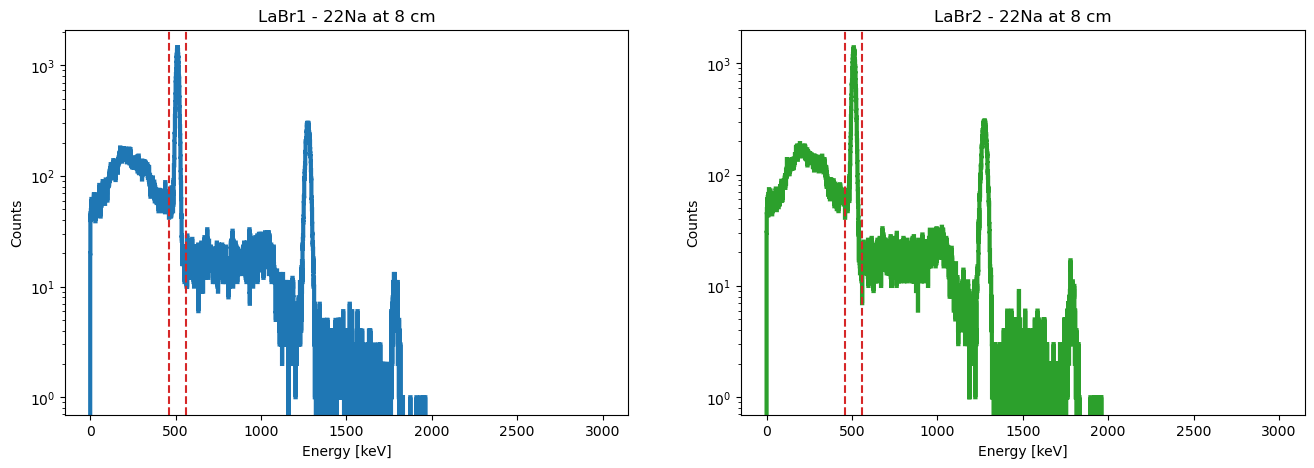

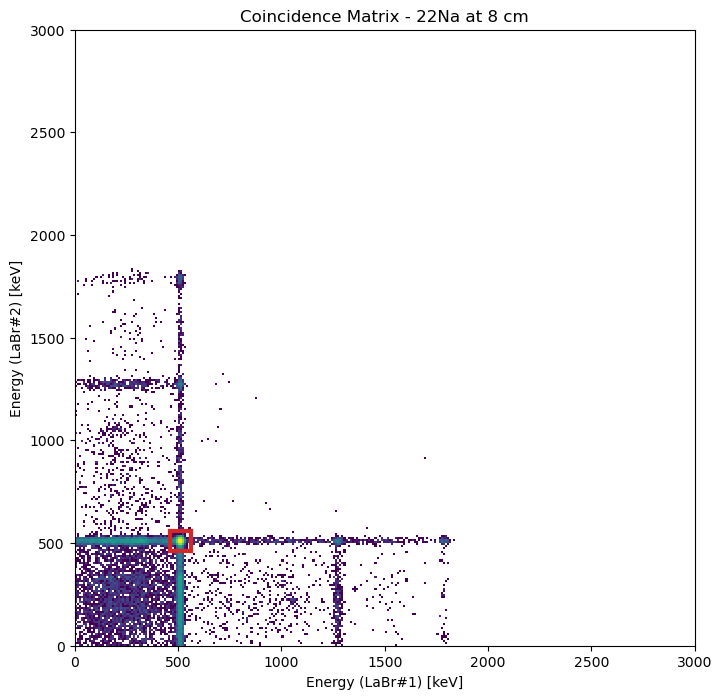

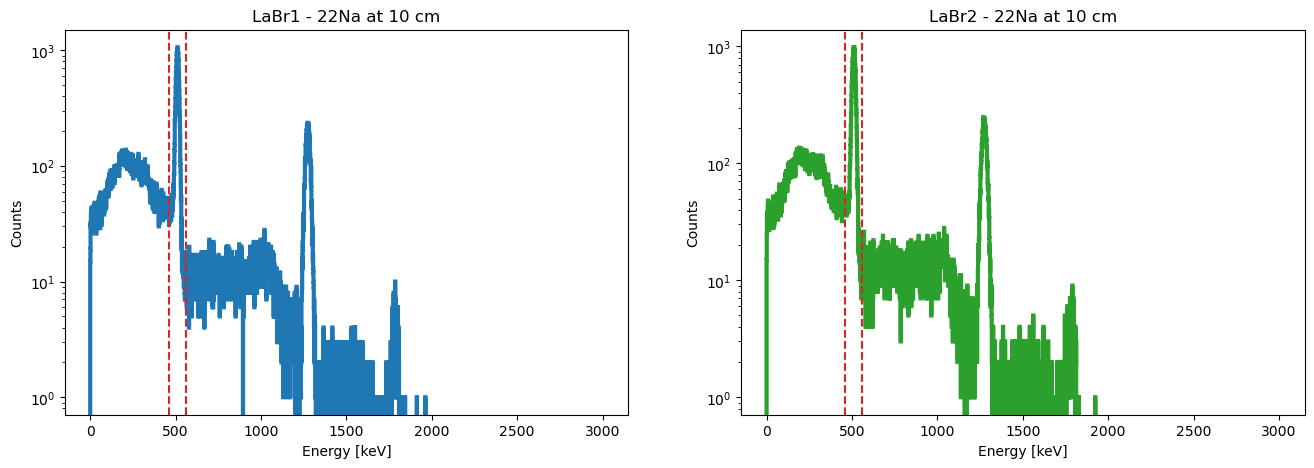

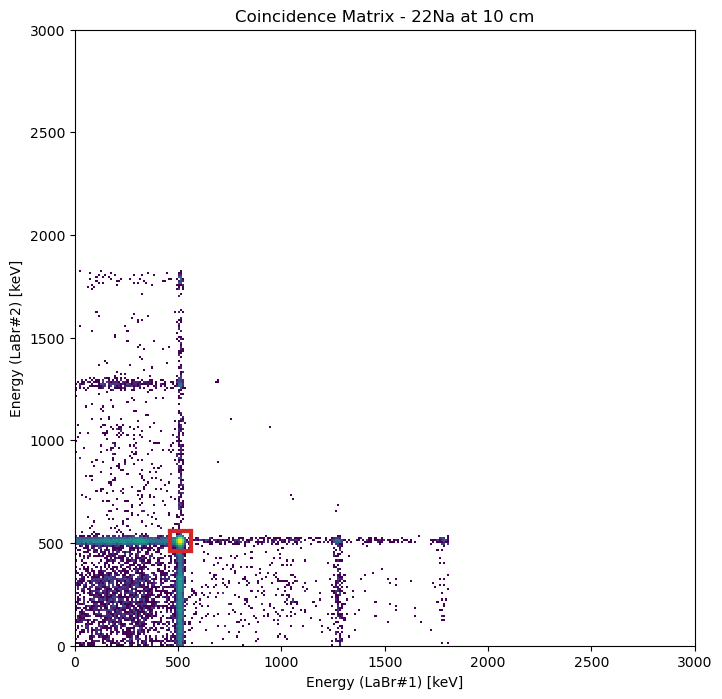

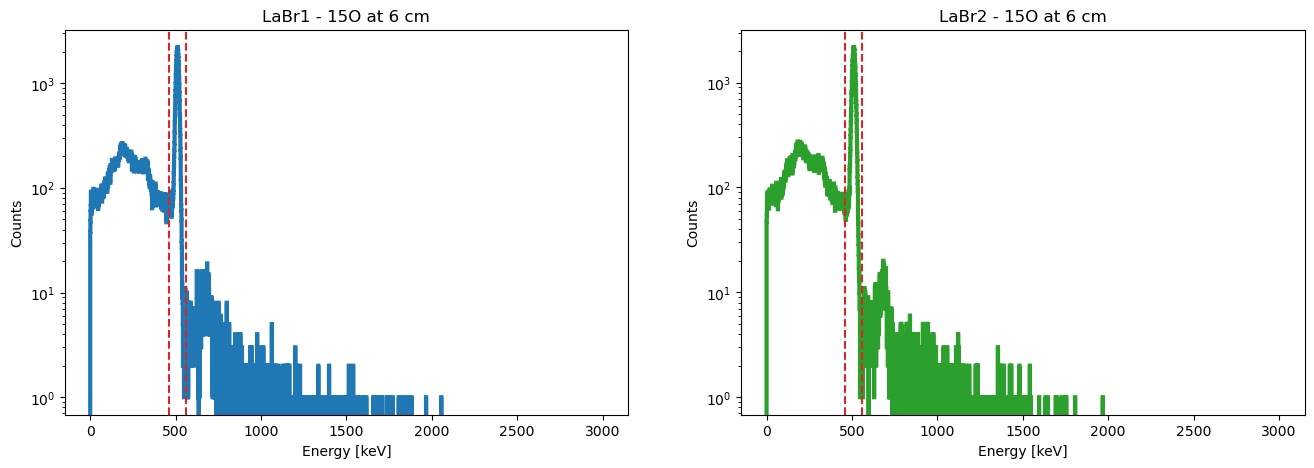

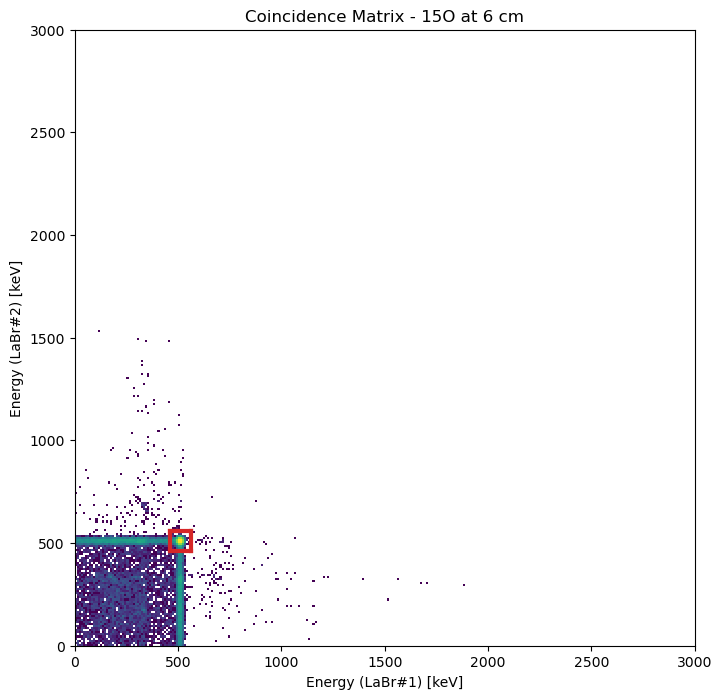

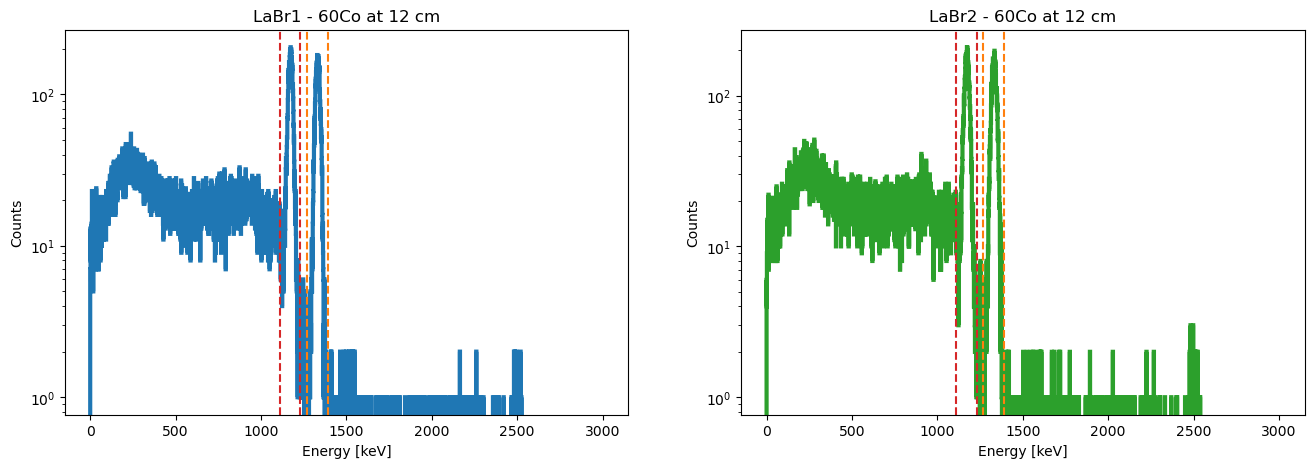

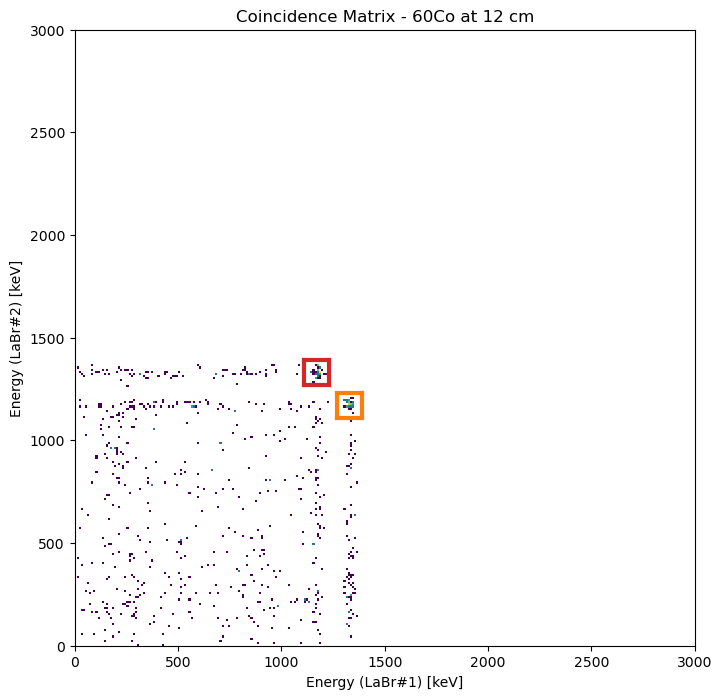

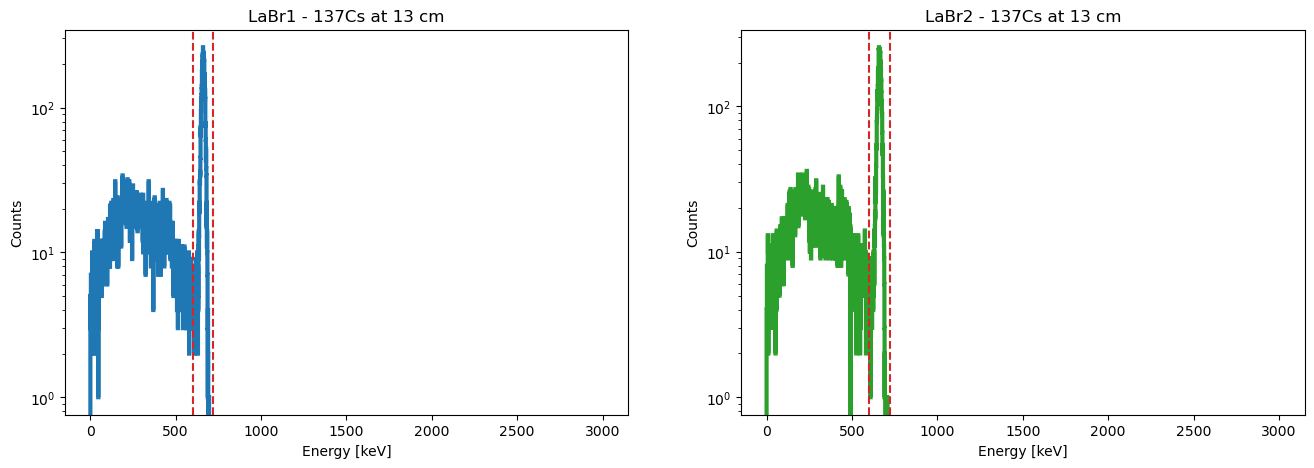

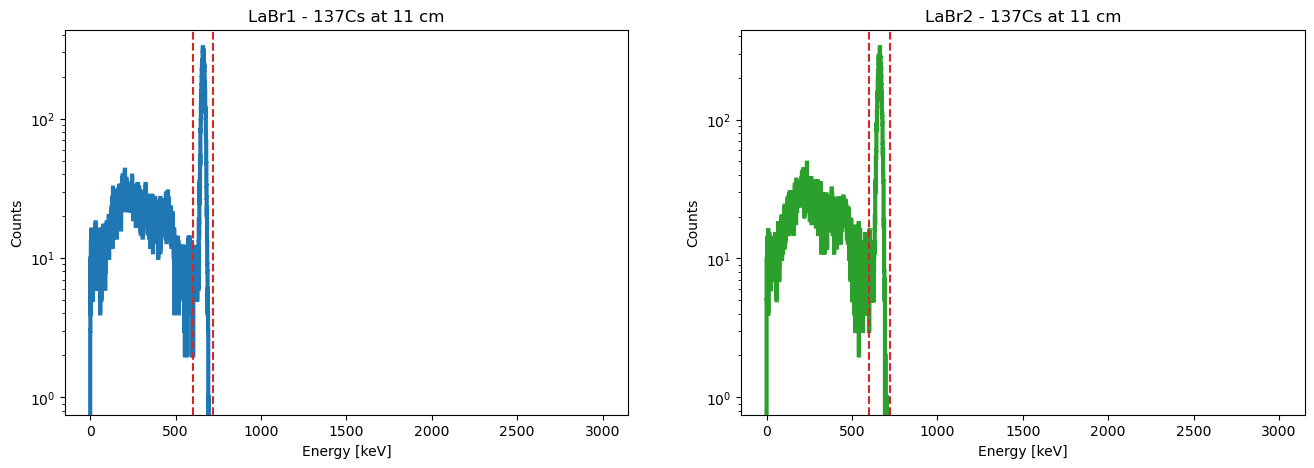

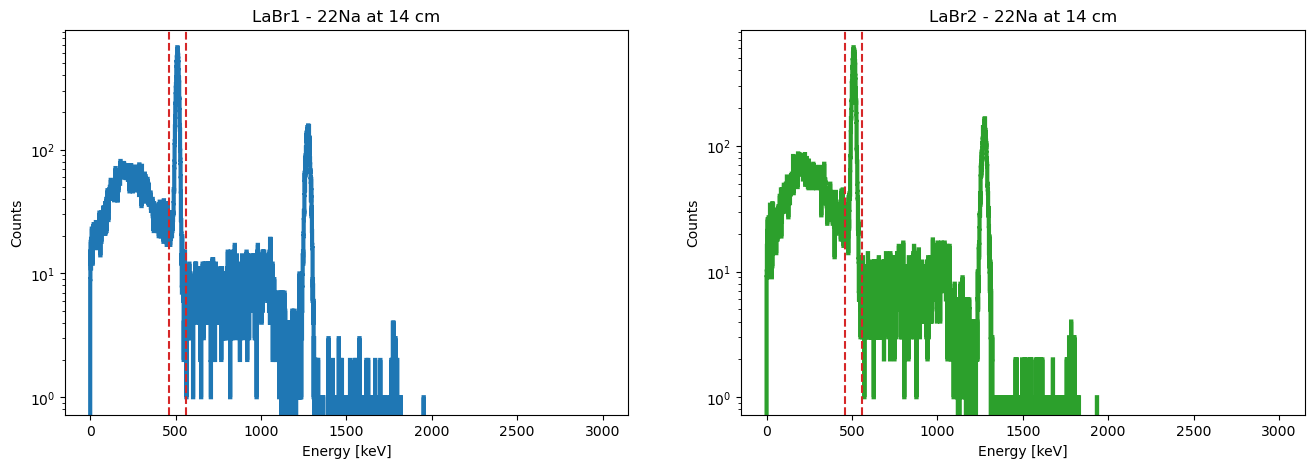

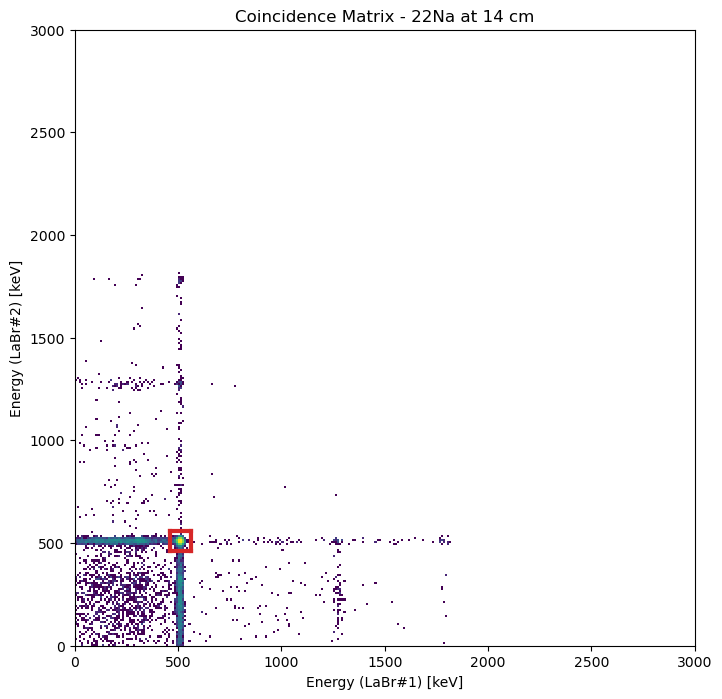

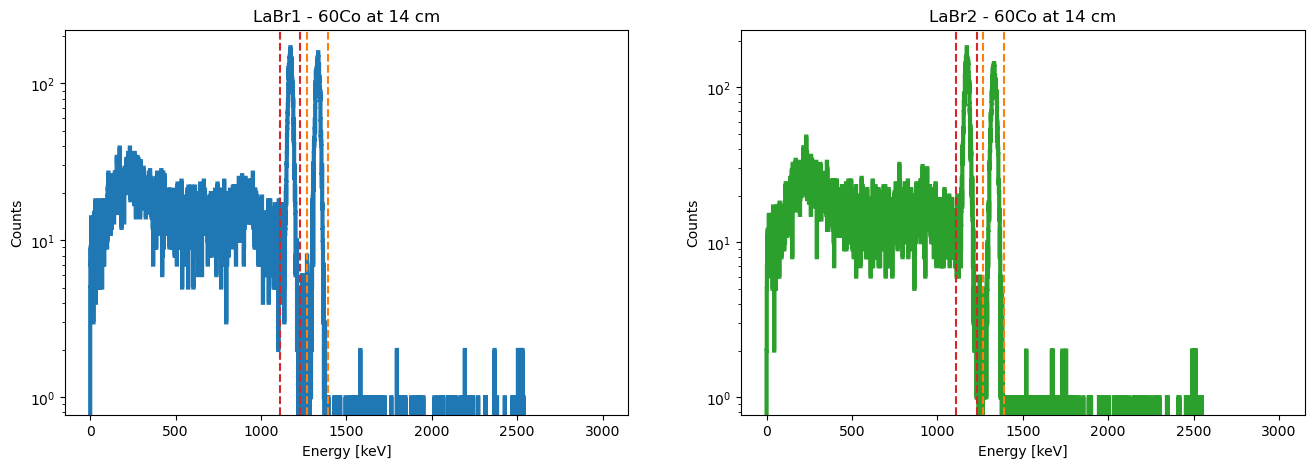

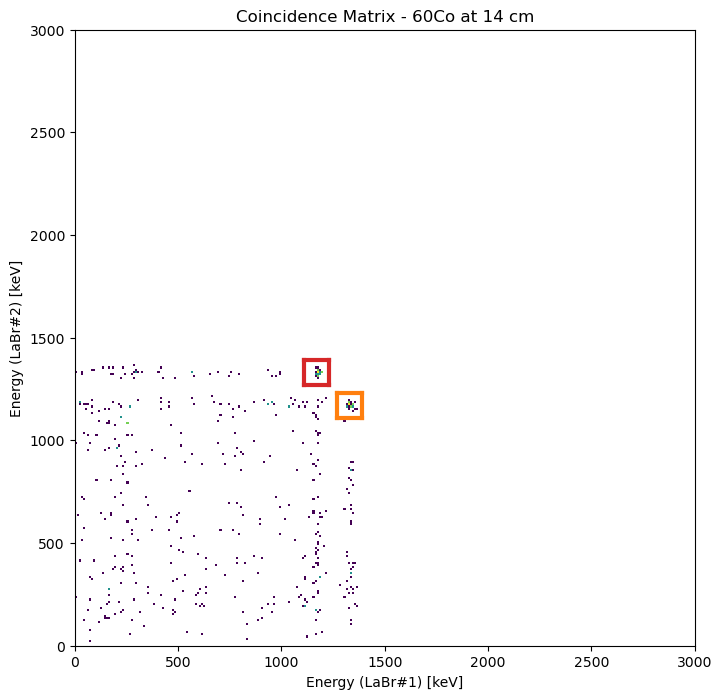

In [9]:
os.system( "rm results/position/*" )

for file in glob("processed/position/*.pkl"):

    source = file.split( "/" )[2].split( "." )[0].split( "_" )[0]
    distance = file.split( "/" )[2].split( "." )[0].split( "_" )[1].split( "cm" )[0]
    
    if( source == "22Na" ): analyze_sodium( file )
    if( source == "60Co" ): analyze_cobalt( file )
    if( source == "137Cs" ): analyze_cesium( file )
    if( source == "15O" ): analyze_oxygen( file )

